In [ ]:
!pip --disable-pip-version-check install plotly==4.13.0 -q
!pip --disable-pip-version-check install vega_datasets -q

import pandas as pd
from google.cloud import storage
import geopandas as gpd
import plotly.express as px
import altair as alt


# Keys to Unlocking Climate Change: A Microlevel Urban Approach towards Macrolevel Global Sustainability 

## Table of Contents
* [Introduction](#section-introduction)
* [CDP Challenge Problem](#section-cdp-challenge)
* [Submission Overview](#section-submission-overview)
* [Literature Review](#section-introduction1)
* [Methodology of Developing Key Performance Indicators](#section-methodology)
* [External Data Sources](#section-external-data)
* [CDP Sustainability Index Methodology](#section-index)
    - [Buiding the CDP Sustainability Index](#section-index-sub)
* [KPI Areas of Concentration](#section-kpi)
    - [Renewable Energy](#section-one)
    - [Water](#section-two)
    - [Governance](#section-three)
    - [Adaptation](#section-four)
    - [Emissions](#section-five)
    - [Mitigation Actions](#section-six)
    - [Climate Hazards](#section-seven)
    - [Opportunities](#section-eight)
* [CDP Sustainability Index Results](#section-index-results)



<a id="section-introduction"></a>

## Introduction
Efforts to deal with the consequences of climate change and the promotion of sustainable development, particularly in developing countries, often have related goals. However, achieving such goals first requires a change in policy, the development of actionable plans, continuous learning and cooperation at a micro level within cities towards the creation and development at a macro level of an environmentally sustainable global society. In order to plan and make actionable targets, there are three factors to consider; the current state of a problem, the risk associated of further exposure to it, and finally the level of adaptability to pivot and deal with the outcomes. 


<a id="section-cdp-challenge"></a>

## CDP Challenge

CDP is a global non-profit that drives companies and governments to reduce their greenhouse gas emissions, safeguard water resources, and protect forests. Each year, CDP takes the information supplied in its annual reporting process and scores companies and cities based on their journey through disclosure and towards environmental leadership.
CDP houses the world’s largest, most comprehensive dataset on environmental action. As the data grows to include thousands more companies and cities each year, there is increasing potential for the data to be utilized in impactful ways. Because of this potential, CDP is excited to launch an analytics challenge for the Kaggle community. Data scientists will scour environmental information provided to CDP by disclosing companies and cities, searching for solutions to our most pressing problems related to climate change, water security, deforestation, and social inequity.

* How do you help cities adapt to a rapidly changing climate amidst a global pandemic, but do it in a way that is socially equitable?
* What are the projects that can be invested in that will help pull cities out of a recession, mitigate climate issues, but not perpetuate racial/social inequities?
* What are the practical and actionable points where city and corporate ambition join, i.e. where do cities have problems that corporations affected by those problems could solve, and vice versa?
* How can we measure the intersection between environmental risks and social equity, as a contributor to resiliency?

Develop a methodology for calculating key performance indicators (KPIs) that relate to the environmental and social issues that are discussed in the CDP survey data. Leverage external data sources and thoroughly discuss the intersection between environmental issues and social issues. Mine information to create automated insight generation demonstrating whether city and corporate ambitions take these factors into account.


<a id="section-submission-overview"></a>

## Submission Overview
This notebook consists of the following sections:

**Literature review**: this section discusses the intersection between environmental issues and social issues at a high-level. A more thorough discussion is found relative to each of our KPIs that have been identified within their respective sections.

**Key Performance Indicator Methodology**: this section discusses the overarching criteria that has been established for setting out KPIs and their various types. Again, a more thorough discussion of the methodology is found in each KPI section. Within this section you will also find a chart with clickable links leading to the various indicators.

**CDP Sustainability Index Methodology**: this section covers the automated insight generation system that has been developed based on the KPIs that have been identified. The section discusses in detail how the index was built and indices have been used as a reference to help build this model.

**Key Performance Indicators**: the section covers each of the key performance indicators that have been assessed.

**CDP Sustainability Index Results**: this section covers the complete automated insight generation system that has been developed based on the KPIs that have been identified. 

<a id="section-introduction1"></a>

## Literature Review
Many studies have shown that climate change has significantly worsened global economic inequality. This increase in inequality is a result of a variety of factors that are not limited to the impact of global warming on annual economic growth, a historical disparity in energy consumption across many regions around the world, increase in population growths, disparities in natural hazard risks and the ability to deal with the consequences of such hazards. (1) While many different regions of the world aim and set targets to reduce the impact or progression of climate change, their mitigation policies can in turn adversely affect those in lower socio-economic groups. In order to be an effective agent of change, governments need to consider the often indirect and complex social issues that are interconnected with climate change by having multi-stakeholder engagement, careful planning and willingly adapting their plans to changing environments. (2) This image below from the HappyCity Index demonstrates the connections between somt of the internal and external factors.


In [ ]:
import os
from IPython.display import Image
Image(filename="../input/dataset-1/metho.png", width= 900, height=700)

When assessing social inequality in a region, it is important to recognize that many of the indicators intersect and overlap with each other. For example, inequality in wealth can influence access to health care, housing opportunities, access to education and job opportunities. (2) This too can be considered when discussing indicators or determinants that influence climate change. For example, increasing levels of C02 emissions can have serious consequences for humans and their environment. Potential effects on human activity can results in increases in water depletion, a greater number of hazardous weather events which then lead to infrastructure damage, changes in food supply, and water quality. Building an automated insight generation system dependent on performance indicators that considers these factors, can help cities develop or adapt their plan and can also assess the efficacy of plans that are also in progress.

References

(1)- https://www.un.org/esa/desa/papers/2017/wp152_2017.pdf 

(2)- https://www.tandfonline.com/doi/full/10.1080/14693062.2019.1596873

<a id="section-methodology"></a>

## Methodology of Developing Key Performance Indicators

When completing our explorative data analysis of the CDP city data, we recognized 8 thematic areas from the questionnaire that we wanted to focus on in our analysis and development of our KPIs. These 8 areas relate to both environmental and social issues in the assessment of cities participating in the CDP surveys. Within these areas, there are KPIs that are related to direct CDP survey responses while others explore opportunities to further delve into the assessment of the efficacy of a city meeting their goals. 

The framework for developing effective performance measurements was to link indicator outputs to potential actionable outcomes that participating cities were already partaking in or could potentially invest in towards creating an environmentally sustainable society. A key part of this framework was to also identify, where possible, the potential social impact within a city that intersects and stands to be affected by the established KPI factors. As a result, the KPIs that have been developed were based on the following criteria:

1.	The indicator is already being measured or could be measure and the data is currently available
2.	There are appropriate baselines that exist for comparison to measure between cities
3.	The measurement can show change over time for adaptation and modification of actionable outcomes
4.	 The indicator is meaningful on both at a local (city) and global (country) scale 

Our KPIs also fall under one of three types of indicators:

1.	Input KPIs: are measures of the resources that go into a service
2.	Output KPIs: are direct measures of the results of the deployment of resources. Often referred to as service management KPIs, they measure short-term changes as a result of inputs
3.	Impact KPIs: reflect long-term effects that are closely related to the purpose of the activity. Many cannot be measured within program timeframes. They usually involve changes to well-being or performance as a result of behaviour change.

**NOTE:** When developing our KPIs we recognized that KPIs directly related to the CDP survey data questions were all input KPIs.

In total we developed 39 KPIs amongst the 8 areas of concentration we identified. For each of our impact and output KPIs we discuss the rationale and relevance, societal impact, methodology, units of measurement and data sources. Each of our input KPI’s are directly drawn from the CDP City Questionare responses. The questions involved primarily contain binary responses or are drawn from fixed set of response options. 


<a id="section-external-data"></a>

## External Data Sources







### 1. Environmental Insights Explorer

Google’s Environmental Insights Explorer (EIE) uses exclusive data sources and modeling capabilities in a freely available platform to help cities measure emission sources, run analyses, and identify strategies to reduce emissions — creating a foundation for effective action. The insights are a modeled estimate based on actual measurements of activity and infrastructure (the same underlying information that is made available in Google Maps). They use advanced machine learning techniques to understand how people are moving around the world, and then apply scaling factors, efficiency and emissions factors.

***Considerations:***
EIE provides comprehensive data for 125 cities that are made public. Data for over 3000 cities are available by request for cities involved and research institutes. 

***Data Usage:***
Open sourced data for Google's EIE is available for each city on its webpage. For the analysis in this notebook, each publicly available dataset was downloaded and mapped to the corresponding CDP city.

[Source](https://insights.sustainability.google/)


In [ ]:
from vega_datasets import data

source = pd.read_csv("../input/dataset-1/insight_explorer_cities.csv")
countries = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
background = alt.Chart(countries).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
)

# airport positions on background
points = alt.Chart(source).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('Population_2018:Q', title='Population Size'),
    color=alt.value('steelblue'),
    tooltip=['City:N','Population_2018:Q']
).properties(
    title='Google Insight Explorer Cities'
)

background + points

### 2. Project Sunroof
Project Sunroof primarily works to encourage the private adoption of solar energy by providing a set of tools to facilitate the purchase and installation of solar panels. Using data from Google Maps to calculate shadows from nearby structures and trees and taking into account historical weather and temperature patterns, the Project Sunroof website calculates how much money a user can expect to save yearly by making use of solar power. In addition, the Project Sunroof website also provides a list of local solar power retailers capable of installing solar panels in that area

***Considerations:***
At this current time, rooftop solar potential data is only available for cities in the United States.

***Data Usage:***
Open sourced data for Project Sunroof is available at the Census Tract and postal code level and hosted as part of Google's BigQuery public datasets. For the analysis in this notebook, geospatial analysis was completed to map the Census Tract data to the regions involved in the CDP study.

[Source](https://www.google.com/get/sunroof)


In [ ]:
import os
from IPython.display import Image
Image(filename="../input/dataset-1/download (7).png", width= 900, height=700)

### 3. Global Assessment Report on Disaster Risk Reduction
The UN Global Assessment Report on Disaster Risk Reduction (GAR) is the flagship report of the United Nations on worldwide efforts to reduce disaster risk. The GAR is published biennially by the UN Office for Disaster Risk Reduction (UNDRR), and is the product of the contributions of nations, public and private disaster risk-related science and research, amongst others.The GAR Atlas presents the output of a Global Risk Model (GRM) that can estimate the disaster risk associated with different kinds of hazard faced by national economies throughout the world.

***Considerations:***
The risk assessments are provided at a large global extent. We leveraged this data in combination with other indicators effecting climate risk for our index. However, if one were to only use this as a sole data driver for a model, caution needs to be taken for extremely localized decisions.

***Data Usage:***
Data for the GAR Atlas was obtained from its website. Geospatial analysis was leveraged to generate an aggregated risk measurement for the regions involved in the CDP survey.

[Source](https://preview.grid.unep.ch/)



### 4. Aqueduct Water Risk Atlas
Aqueduct's global water risk mapping tool helps companies, investors, governments, and other users understand where and how water risks and opportunities are emerging worldwide. The Atlas uses a robust, peer reviewed methodology and the best-available data to create high-resolution, customizable global maps of water risk.

***Data Usage:***
Geospatial analysis was leveraged to extract the water risk metrics for regions in the CDP survey.

[Source](https://www.wri.org/aqueduct#aqueduct-tools)


In [ ]:
from vega_datasets import data



source = pd.read_csv("../input/dataset-1/aquaduct.csv")
source = source.rename(columns={"udw_score": "Drinking Water Risk (0-5)", 
                                "state_name": "State", 
                                "county_name": "County"
                               })
counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('Drinking Water Risk (0-5):Q',
              scale=alt.Scale(domain=[0,5])),
    tooltip=['State:N', "County:N", 'Drinking Water Risk (0-5):Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ["Drinking Water Risk (0-5)", "County", "State"])
).project(
    type='albersUsa'
).properties(
    title='Drinking Water Risk',
    width=1000, height = 700
               )

### 5. Organisation for Economic Co-operation and Development
Statistics include data and metadata for OECD countries and selected non-member economies at varying levels of regional granularity.

***Considerations:***
For this analysis data was extracted for metropolitan regions when available. Smaller cities and regions maybe under-represented and would require the use of inference from national statistics.

***Data Usage:***
Geospatial analysis was leveraged to extract the metrics for regions in the CDP survey.

[Source](https://stats.oecd.org/)



### 6. Other Data Sources
**1. Global Wind Atlas** GWA is an open-source dataset to help policymakers and investors identify potential high-wind areas for wind power generation virtually anywhere in the world, and perform preliminary calculations. Granular datasets for wind power estimates are available at a global scale.[Source](https://globalwindatlas.info/)

**2. BigQuery Public Data Sets** BigQuery host open-source data sets from a wide-variety of data providers. [Source](https://cloud.google.com/public-datasets)

**3. Green Space**
Green area per capita is calculated from Green area per million people and city population data source from OECD. [Source](https://data.humdata.org/dataset/green-area-per-capita-square-meters-per-capita)



## Key Performance Indicators


<a id="section-toc"></a>

<table background=none >
    <thead>
        <tr>
            <th style="text-align:center">Section</th>
            <th style="text-align:center">KPI Name</th>
            <th style="text-align:center">Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:center" rowspan=5>
                <a href="#section-one">1. Renewable Energy</a>
            </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-one-one"> 1.1 Set renewable energy target</a>
            </td>
            <td style="text-align:center" rowspan=2>Input KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-one-two">1.2 Set energy efficiency target</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-one-three">1.3 Rooftop Solar Potential</a>
            </td>
            <td style="text-align:center" rowspan=3>Output KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-one-four">1.4 Wind Energy Potential</a>
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-one-five">1.5 Renewable energy sources in electricity production</a>
            </td>
        </tr>
                <tr>
            <td style="text-align:center" rowspan=6>
                <a href="#section-two">2. Water</a>
                    </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-two-one">2.1 Water resource management strategy present</a>
                    </td>
            <td style="text-align:center" rowspan=2>Input KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
                <a href="#section-two-two">2.2 Actions taken to reduce risk (when present)</a>       
            </td></tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-two-three">2.3 Water stress</a>
            </td>
            <td style="text-align:center" rowspan=4>Output KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-two-four">2.4 Water depletion</a>
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-two-five">2.5 Drinking Water Risk</a>
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-two-six">2.6 Water Sanitation Risk</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-three">3.0 Governance</a>
            </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-three-one">3.1 Goals & targets set for sustainability</a>
            </td>
            <td style="text-align:center" rowspan=1>Input KPI</td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-four">4.0 Adaptation</a>
            </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-four-one">4.1 Creation of a climate change adaptation plan</a>
            </td>
            <td style="text-align:center" rowspan=1>Input KPI</td>
        </tr>
                <tr>
            <td style="text-align:center" rowspan=9>
                <a href="#section-five">5.0 Emissions</a>
                    </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-five-one">5.1 City-wide inventory present</a>
                    </td>
            <td style="text-align:center" rowspan=3>Input KPI</td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-five-two">5.2 City-wide inventory externally verified</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-five-three">5.3 Detailed city-wide consumption-based inventory available</a>   
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-five-four">5.4 Energy usage for non-residential building</a>
            </td>
            <td style="text-align:center" rowspan=2>Output KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-five-five">5.5 Energy usage for residential buildings</a>
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-five-six">5.6 Total Degree Days</a>
            </td><td style="text-align:center" rowspan=1>Impact KPI</td></tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-five-seven">5.7 Residential Emissions</a>
            </td><td style="text-align:center" rowspan=3>Output KPI</td></tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-five-eight">5.8 Non-residential Emissions</a>
            </td></tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-five-nine">5.9 Transportation emissions by mode-share</a>
            </td></tr>
        <tr>
            <td style="text-align:center" rowspan=2>
                <a href="#section-six">6.0 Mitigation Actions</a>
            </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-six-one">6.1 Emission reduction targets in place</a>
            </td>
            <td style="text-align:center" rowspan=2>Input KPI</td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
                <a href="#section-six-two">6.2 Emission reduction action plan in place</a>
            </td></tr>
        <tr>
            <td style="text-align:center" rowspan=10>
            <a href="#section-seven">7.0 Climate Hazards</a>
            </td>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-one">7.1 Climate risk assessment complete</a>
            </td>
            <td style="text-align:center" rowspan=1>Input KPI</td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-two">7.2 Total population</a>
            </td>
            <td style="text-align:center" rowspan=9>Output KPI</td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-three">7.3 Percent of population living in poverty</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-four">7.4 Unemployment Rate</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-five">7.5 Household disposable income</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-six">7.6 Average yearly PM2.5</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-seven">7.7 Exposed economic capital stock</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-seven-eight">7.8 Riverine flood risk</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-seven-nine">7.9 Coastal flood risk</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
                <a href="#section-seven-ten">7.10 Drought risk</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=5>
                <a href="#section-eight">8.0 Opportunities</a>
            </td>
            <td style="text-align:center" rowspan=1>
                <a href="#section-eight-one">8.1 Identified economic or social opportunities related to addressing climate change</a>
            </td>
            <td style="text-align:center" rowspan=2>
                Input KPI
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-eight-two">8.2 Collaboration with local businesses</a>
            </td>
        </tr>
        <tr>
            <td style="text-align:center" rowspan=1>
            <a href="#section-eight-three">8.3 Green Space</a>
            </td>
            <td style="text-align:center" rowspan=3>
                Output KPI
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-eight-four">8.4 Presence of a zero-emission zone</a>
            </td>
        </tr>
        <tr><td style="text-align:center" rowspan=1>
            <a href="#section-eight-five">8.5 Public transportation usage</a>
            </td>
        </tr>
    </tbody>
</table>



Once measured, we developed an index that utilizes an interdisciplinary approach to highlight the intersection between environmental and social issues.

<a id="section-index"></a>

## CDP Sustainability Index Methodology

Indices are helpful tools that can provide insights and help track the performance of something using composite indicators. A composite indicator is formed when individual indicators are compiled into a single index, on the basis of an underlying model of a multi-dimensional concept that is being measured. 

There are currently a number of existing indices that tackle various aspects of climate change. The two that we identified as a foundation for to help build the CDP Sustainability Index are the following:

Climate Change Performance Index (CCPI): the CCPI is an independent monitoring tool of countries’ climate protection performance. It aims to enhance transparency in international climate politics and enables the comparability of climate protection efforts and progress made by individual countries. The ranking results are defined by a country’s aggregated performance in 14 indicators within the four categories “GHG Emissions”, “Renewable Energy” and “Energy Use”, as well as on “Climate Policy”. (1)  

Environmental Performance Index: provides a data-driven summary of the state of sustainability around the world. Using 32 performance indicators across 11 issue categories, the EPI ranks 180 countries on environmental health and ecosystem vitality (2)

References:

1: https://www.climate-change-performance-index.org/ 

2: https://epi.yale.edu/ 


In [ ]:
import os
from IPython.display import Image
Image(filename="../input/dataset-1/CDP INDEX (1).png", width= 900, height=700)

<a id="section-index-sub"></a>

## Building the CDP Sustainability Index

Using our KPIs we developed an index that uses mix of quantitative and qualitative measures to evaluate each of CDP cities with respect to their current environmental performance across our 8 categories as well as their relative performance to their peer cities. 

To develop the index, we used the [OECD’s handbook](https://www.oecd.org/els/soc/handbookonconstructingcompositeindicatorsmethodologyanduserguide.htm) as a guide to develop our methodology following an 8 step approach:

1.	**Theoretical Framework**: a theoretical framework is needed to combine individual indicators into a meaningful composite and to provide a basis for the selection of components. Our framework for our KPIs are discussed in more detail in the methodology section of the notebook.  

2.	**Data Selection**: the quality of composite indicators depends largely on the quality of individual indicators. Indicators should be selected on the basis of their analytical soundness, measurability, relevance to the phenomenon being measured, and relationship to each other. Our relevance, soundness, and measurability of our KPIs is discussed in further detail under each KPI section. The criteria for our KPIs are discussed in the methodology section.

3.	**Imputation of Missing Data**: in most statistical series, composite indicators are plagued by problems of missing values. In many cases, data are only available for a limited number of areas or only for certain data components. Missing values can render the composite indicator less reliable for the areas for which only limited information is available and can distort the relative standing of all indicators in the composite. For our index we account for missing data by using two approaches. (1) When there was sufficient regional data, we used a nearest neighbour approach to impute missing values (2) When the data for a certain KPI was only available for a limited subset of cities, we did not impute values given the risk of the value potentially representing incomparable areas (we took the average index of the remaining indicators)

4.	**Multivariate Analysis**: multivariate analysis can be helpful in assessing the suitability of the dataset and providing an understanding of the implications of the methodological choices (e.g. weighting, aggregation) during the development of a composite indicator. For our index, we considered the principal component/factor analysis, however due to the fact a significant amount of the input KPIs are binary indicators, this would affect the performance and usefulness of index. Instead we opted to use cluster analysis, to group comparable cities in terms of their similarity with respect to the different regional characteristics.  

5.	**Normalisation**: indicators are expressed in a variety of statistical units, ranges or scales. First, they must be adjusted on dimensions such as size/population/income and smoothed through time against cyclical variability. Next, they need to be put on a common basis to avoid adding up apples and pears. Normalisation serves this purpose. For our index we used a combination of normalisation techniques to ensure that cities and KPIs were compared appropriately. These techniques included min-max scaling and percentile ranking.

6.	**Weighting**: weights usually have an important impact on the composite indicator value and on the resulting ranking especially whenever higher weight is assigned to indicators on which some regions excel or fail. Weighting methods can be statistical, based on public/expert opinion, or both. For our index we used a relative weighing scheme that is in line with those used by the [Climate Change Performance Index](https://www.climate-change-performance-index.org/methodology), with modification made to accomodate the additional factors.

7.	**Aggregating Indicators**: aggregation combines the values of a set of indicators into a single summary ‘composite’ or ‘aggregate’ measure. For our index we took the average of the normalised scores.

8.	**Sensitivity Analysis**: sensitivity analysis quantifies the uncertainty caused by each individual assumption, which identifies particularly sensitive assumptions which might merit closer consideration. For our index we implemented a sensitivity assessment based on the imputation method leveraged. We compare the distributions of the index scores based on the two imputation schemes leveraged in order to assess the stability of the results. 


Please see below a summary report documenting key findings of our CDP Index about each city which highlights the best performing cities, and making comparisons between regions. Using this index, cities can learn from each other as they establish their own policies and actions plan and pivot and make adaptations to existing plans to minimize their environmental footprint, accommodate population growth, promote economic opportunity all taking into account social inequality and creating opportunities for citizens within lower socioeconomic groups.



Below you will find a radar plot of the Top 10 ranked cities in North America from our autogenerated CDP Sustainability Index.  You can double click on the legend to view the scores for each individual city. 

For our full index results, please see [CDP Sustainability Index Results](#section-index-results).

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=10) & (subset_df['CDP Region']=="North America")], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

<a id="section-kpi"></a>
## KPI Areas of Concentration


<a id="section-one"></a>
    
## 1. Renewable Energy 

Renewable energy comes from natural sources or processes that are constantly replenished. For example, sunlight or wind keep shining and blowing, even if their availability depends on time and weather. Many regions across the globe are increasingly evaluating the potential of harnessing renewable energy in an effort to displace the reliance and use of fossil fuels in the power sector as renewable energy offers the benefit of lower emissions of carbon and other types of pollution. Such expansion in renewables is happening at scales large and small, from rooftop solar panels on homes that can sell power back to the grid to giant offshore wind farms. There are even some entire rural communities that rely on renewable energy for heating and lighting. This concentration considers various types of renewable energy potential and the degree to which cities could harness this potential to produce a practical energy output.

Our KPIs within this concentration are listed below.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-one-one"></a>

### 1.1 Renewable Energy Target Set

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question assess whether the participating city has a renewable energy or electricity target.
 
*Question 8.0 - Does your city have a renewable energy or electricity target?*


#### Unit

The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know


#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire

#### Analysis

When looking at the responses from the CDP Questionannire, question 8, we can see that although the total number of responses has decreased from 2019 to 2020, the ratio of cities indicating that they have or are planning to set a renewable energy or electricity target is stable. Part of the reason for a decrease in 2020, might be a result of the current COVID-19 pandemic. However, cities in East Asia are reporting higher respones of 'yes'or 'intending to undertake in the next two years'between 2019 and 2020. 

<a href="#section-toc">Back to Table of Contents</a>

In [ ]:
data = pd.read_csv("../input/dataset-1/8.0_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-one-two"></a>
### 1.2 Energy Efficiency Target Set

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has set an energy effeciency target.
 
*Question 8.5/8.6 (2020/2019) - Does your city have a target to increase energy efficiency?*


#### Unit

The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources


CDP Cities Questionaire

#### Analysis

When looking at the responses from the CDP Questionannire, question 8.5-(2020) and 8.6-(2019), we can see that although the total number of responses has decreased from 2019 to 2020, the ratio of cities indicating that they have or are planning to set an energy effeciency target is stable. Part of the reason for a decrease in 2020, might be a result of the current COVID-19 pandemic.

<a href="#section-toc">Back to Table of Contents</a>

In [ ]:
data =  pd.read_csv("../input/dataset-1/8.5_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-one-three"></a>
### 1.3 Rooftop Solar Potential

#### Description 

Here we look the technical estimated rooftop solar potential of buildings in a city using imagery, roof size and shape, shaded roof area calculations, local weather data and estimating the greenhouse gas emissions that could be avoided if solar power is used within a region. 

The metric within this KPI indicates the potential amount of electricity that could be generated if all of the potential viable rooftop solar installations were implemented. 

#### Rationale

Solar energy is one type of renewable energy that is capable of contributing to the reduction of energy dependence as well as energy-related environmental impacts and can reduce and offset the emissions from fossil fuel electricity generation. The potential for electricity to be generated from solar sources can avoid emissions from electricity from fossil fuels.

#### Societal Impact

Job creation: when cities or companies decide to build and operate solar energy facilities, the projects often help to create numerous jobs.

Economics: with more people able to find employment as a result of the increased number of jobs created by the development and operation of solar energy panels, more people would have money to contribute to a nation's economy. Also, manufacturing solar energy is less expensive than burning fossil fuels, which is the traditional method of generating electricity.

Health: generating energy from solar panels emits very little pollution into the air, and thus solar energy is a much cleaner source of energy than the burning of fossil fuels. Cities or areas that decide to use solar energy to power the buildings would thus enjoy a cleaner quality of air in the region, which in turn can make the citizens and workers in the area healthier.

#### Methodology

Google Insights Explorer estimates the technical solar potential of all buildings in a region. Knowledge about building shapes is calculated using a machine learning algorithm using data from Google Maps and overhead imagery.

Technical potential includes electricity generated by the rooftop area suitable for solar panels assuming economics and grid integration are not a constraint. There are many definitions of technical potential and other definitions may affect results by 25% or more. Based on their definition of technical potential, installations meet the following criteria:

**Sunlight**: Every included panel receives at least 75% of the maximum annual sun in the area.

**Installation size**: Every included roof has a total potential installation size of at least 2kW.

**Space and obstacles**: Only areas of the roof with enough space to install 4 adjacent solar panels are included. Obstacles like chimneys are considered.


#### Unit

Metric tons of yearly CO2 savings

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the geospatial centres all of the census tracts in the Project Sunroof dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a sum of the total solar potential for each census tract mapped to a CDP City. 

$$ Total Solar Potential_{City}= {\sum_{i} Total Solar Potential_{CensusTract}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ Total Solar Potential Normalized_{City}= \frac{(Total Solar Potential _{City} - \min(Total Solar Potential _{City})}{\max(Total Solar Potential _{City}) - \min(Total Solar Potential _{City})}$$


#### Data Sources

Google Project Sunroof

The data for this analysis was obtained in a granular format (Census Tract) and a subset of the data for Fresno County, in California, is mapped below. Regions with a brighter colour indicate a higher amount of estimated rooptop solar potential.  

<a href="#section-toc">Back to Table of Contents</a>

In [ ]:
solar_potential_subset_gdf = gpd.read_file("../input/dataset-1/solar_potential_subset_gdf.gpkg", layer='solar_potential_subset_gdf')

fig = px.choropleth_mapbox(solar_potential_subset_gdf,
                           geojson=solar_potential_subset_gdf.geometry,
                           locations=solar_potential_subset_gdf.index,
                           color="carbon_offset_metric_tons",
                           center={"lat": solar_potential_subset_gdf.centroid.y.iloc[0],
                                   "lon": solar_potential_subset_gdf.centroid.x.iloc[0]},
                           mapbox_style="open-street-map",
                           color_continuous_scale="Viridis",
                           hover_name = "carbon_offset_metric_tons",
                           hover_data = {"county_name":True, "state_name":True, "carbon_offset_metric_tons":':.0f', "kw_total":':.0f', 
                                         "existing_installs_count":True, "count_qualified": True},
                           labels = {
                               "carbon_offset_metric_tons": "Carbon Offset Potential (Metric Tons)",
                               "kw_total": "Total # of kW of rooftop solar potential",
                               "existing_installs_count": "Existing solar panel installations (# of buildings)",
                               "count_qualified": "Potential solar panel installations (# of buildings)",
                               "index": "Census Tract",
                               "county_name": "County",
                               "state_name": "State"},
                           title = "Carbon Offset Potential (Metric Tons)",
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
from vega_datasets import data

source = pd.read_csv("../input/dataset-1/project_sunroof_coverage.csv")
source = source.rename(columns={
    "carbon_offset_metric_tons": "Carbon Offet Potential (Metric Tons)",
    "county_name": "County",
    "state_name": "State",


})

counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape().encode(
    color='Carbon Offet Potential (Metric Tons):Q',
    tooltip=['State:N', "County:N"]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ["Carbon Offet Potential (Metric Tons)", "County", "State"])
).project(
    type='albersUsa'
)

We then aggregated the data to asses the carbon offset potential if solar rooptops were utilized within major cities across the United States. Ideally, participating CDP cities with eletricity and emission targets that have already been set or are in progress can utilize this data and implement programs or services to advance and achieve their sustainability goals. Cities that have not yet set a target or action plan can also use this data to set realistic timelines and programs for renewable energy utilization and increased energy efficiency.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

solar_potential_cdf = pd.read_csv("../input/dataset-2/results-20201125-191757.csv")
solar_potential_cdf["carbon_offset_metric_tons"] = solar_potential_cdf["carbon_offset_metric_tons"].where(pd.notnull(solar_potential_cdf["carbon_offset_metric_tons"]), 0)

solar_potential_cdf = solar_potential_cdf[solar_potential_cdf['year_reported_to_cdp'] == 2019]

solar_potential_cdf['city_location'] = solar_potential_cdf['city_location'].apply(wkt.loads)
solar_potential_cdf_gdf = gpd.GeoDataFrame(solar_potential_cdf, geometry='city_location')

fig = px.scatter_geo(solar_potential_cdf_gdf,
                    lat=solar_potential_cdf_gdf.geometry.y,
                    lon=solar_potential_cdf_gdf.geometry.x,
                    hover_name="organization",
                    projection='albers usa',
                    scope='usa',
                    color="carbon_offset_metric_tons",
                    size = "carbon_offset_metric_tons",
                    color_continuous_scale= "viridis",
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "carbon_offset_metric_tons": True,
                        "existing_installs_count": True,
                        "count_qualified": True
                    },
                    labels = {
                        "lat": "Latitude",
                        "lon": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "carbon_offset_metric_tons": "Carbon Offset Potential (Metric Tons)",
                        "existing_installs_count": "Existing solar panel installations (# of buildings)",
                        "count_qualified": "Potential solar panel installations (# of buildings)"
                    }
                    )
fig.show()

<a id="section-one-four"></a>
### 1.4 Wind Energy Potential

#### Description
Here we look at wind climate data that estimates the average wind power density at a 50meter height above a region. The average wind power density is a measure of the wind resource in a region. Higher average wind power densities indicate better wind resource potentials to generate mechanical power or electricity

The metric is also an indicator for the potential to generate electricity from wind turbines or comparable methods installed in suitable locations.

#### Rationale

The potential for electricity to be generated from wind sources can avoid emissions from the generation of electricity directly sourced from fossil fuels.
Job creation: wind energy projects result in jobs in various communities in manufacturing, transportation, and project construction.

#### Societal Impact

Economics: with more people able to find employment as a result of the increased number of jobs created by the development and operation of wind energy farms, more people would have money to contribute to a nation's economy.

Health: another social impact is that citizens’ health would increase over time as people would not be exposed to as many hazardous wastes and emissions from the movement away from burning fossil fuels and using cleaner, greener energy in wind power.

#### Methodology

The detailed wind-speed estimates are generated using a downscaling process. This process begins with large-scale wind climate data and ends with microscale wind climate data. The result is a set of generalized wind climates that have the same spacing as the mesoscale data that was used to create them. This generalization post-processing method has been used extensively in a number of wind resource assessment studies.

For more detailed instructions about how the estimates are generated, please see reference https://globalwindatlas.info/about/method.

#### Unit 

Average wind intensity by meters per second at a height of 50m.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

2. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the wind dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a sum of the wind solar potential for each measurement point mapped to a CDP City. 

$$ Total Wind Potential_{City}= {\sum_{i} Total Wind Potential_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ Total Wind Potential Normalized_{City}= \frac{(Total Wind Potential _{City} - \min(Total Wind Potential _{City})}{\max(Total Wind Potential _{City}) - \min(Total Wind Potential _{City})}$$


#### Data Sources

Data/information/map obtained from the] “Global Wind Atlas 3.0, a free, web-based application developed, owned and operated by the Technical University of Denmark (DTU). The Global Wind Atlas 3.0 is released in partnership with the World Bank Group, utilizing data provided by Vortex, using funding provided by the Energy Sector Management Assistance Program (ESMAP). For additional information: https://globalwindatlas.info”

<a href="#section-toc">Back to Table of Contents</a>

The data for this analysis was obtained in a granular format (Census Tract) and a subset of the data for Alameda County, in California, is mapped below. Regions with a brighter colour indicate a higher amount of wind energy potenial using wind intensity at a 50M elevation as an indicator.

In [ ]:
wind_potential_cdf = pd.read_csv("../input/dataset-1/wind_potential_subset_gdf.csv")
wind_potential_cdf['WKT'] = wind_potential_cdf['WKT'].apply(wkt.loads)
wind_potential_cdf = gpd.GeoDataFrame(wind_potential_cdf, geometry='WKT')


fig = px.choropleth_mapbox(wind_potential_cdf,
                           geojson=wind_potential_cdf.geometry,
                           locations=wind_potential_cdf.index,
                           color="_mean",
                           center={"lat": wind_potential_cdf.centroid.y.iloc[0],
                                   "lon": wind_potential_cdf.centroid.x.iloc[0]},
                           mapbox_style="open-street-map",
                           color_continuous_scale="Viridis",
                           hover_name = "lsad_name",
                           hover_data = {"lsad_name":True, "area_land_meters":':.0f', "area_water_meters":':.0f', "_mean":':.0f'},
                           labels = {
                               "lsad_name": "Census Tract",
                               "area_land_meters": "Total Area (Land)",
                               "area_water_meters": "Total Area (Water)",
                               "_mean": "Average Wind Intensity (50M Elevation)"},
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We then aggregated the data to asses the wind energy potential for major cities across the United States. Ideally, participating CDP cities with eletricity and emission targets that have already been set or are in progress can utilize this data and implement programs or services to advance and achieve their sustainability goals. Cities that have not yet set a target or action plan can also use this data to set realistic timelines and programs for renewable energy utilization and increased energy efficiency.

In [ ]:
wind_potential_cdf = pd.read_csv("../input/dataset-1/wind_potential_cdp.csv")
wind_potential_cdf = wind_potential_cdf[(wind_potential_cdf["country"]=="United States of America") & (wind_potential_cdf["year_reported_to_cdp"]== 2019)]

fig = px.scatter_geo(wind_potential_cdf,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    projection='albers usa',
                    scope='usa',
                    color="_mean",
                    size="_mean",
                    color_continuous_scale= "viridis",
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "_mean": True
                    },
                    range_color = [0,500],
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "_mean": "Average Wind Intensity (50M Elevation)"
                    }
                    )
fig.show()

<a id="section-one-five"></a>
### 1.5 Renewable Energy Sources in Electricity Production

#### Description

Here we look at the primary electricity generation source in a region. The data assess whether the primary source is generated from a renewable energy sources or fossil fuel intensive sources.

#### Rationale

Energy generated from renewable energy sources such as solar, wind, geothermal, bioenergy and hydropower produce lower levels of CO₂ emissions.

#### Methodology

We grouped this into a binary indicator for our CDP Sustainability Index analysis.

1 – If electricity generated from Solar, wind, geothermal, bioenergy, hydro
0 - otherwise

#### Unit

Binary Indicator


#### KPI Score Conversion

Given that we needed to map the power plants to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the locations all of power plants in the wind dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 200 kilometers to a CDP city.
3. We sorted the power plants within a 200 kilometer radius based on their mW capacity and assigned the plant with the higher capacity as the primary energy source type.
4. If the plant was of type solar, wind, geothermal, bioenergy, hydro set the value to 1
took a sum of the wind solar potential for each measurement point mapped to a CDP City. 



#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

Global Energy Observatory, Google, KTH Royal Institute of Technology in Stockholm, Enipedia, World Resources Institute. 2018. Global Power Plant Database. Published on Resource Watch and Google Earth Engine; http://resourcewatch.org/ https://earthengine.google.com/

<a href="#section-toc">Back to Table of Contents</a>

Here we used this data to identify the primary energy sources for major cities within the United States to first determine whether or not the main energy source is derived from a renewable energy source. You can view individual primary sources by double-clicking the fuel type in the legend on the right side of the map below. The size of each data point represents the total capacity of the energy source. Cities are mapped to their closest energy source available for use. 

In [ ]:
renewable_energy_source_cdf = pd.read_csv("../input/dataset-1/kpi_output_files_4_renewable_energy_loc.csv")
renewable_energy_source_cdf["generation_gwh"] = renewable_energy_source_cdf["generation_gwh"].where(pd.notnull(renewable_energy_source_cdf["generation_gwh"])|renewable_energy_source_cdf["generation_gwh"]<0, None)
renewable_energy_source_cdf["renewable_source"] = renewable_energy_source_cdf["primary_fuel"].isin(["Solar", "Wind", "Geothermal", "Bioenergy", "Hydro"])

fig = px.scatter_geo(renewable_energy_source_cdf[renewable_energy_source_cdf["year"]==2017],
                    lat="latitude",
                    lon="longitude",
                    hover_name="name",
                    projection='albers usa',
                    scope='usa',
                    color="primary_fuel",
                    size = "capacity_mw",
                    color_continuous_scale= "viridis",
                    facet_col="renewable_source",
                    hover_data = {
                        "name": True,
                        "owner": True,
                        "country_long": True,
                        "primary_fuel": True,
                        "generation_gwh":True,
                        "source": True
                        
                    },
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "name": "Plant Name",
                        "owner": "Plant Owner",
                        "country_long": "Country",
                        "primary_fuel": "Fuel Type (Primary)",
                        "capacity_mw": "Capacity (MW)",
                        "generation_gwh": "Generation (GWH)",
                        "renewable_source": "Renewable Energy Source",
                        "source": "Reporting Source"

                    }
                    )
fig.show()

<a id="section-two"></a>

## 2.0 Water

The assessment of water quality and consumption can help put in context a city’s ecological deficit or reserve that can ultimately affect the environmental quality with a region. They are interconnected as water quality has a huge impact on water supply and oftentimes can also determine the supply availability and options. Water quality standards for surface waters can vary significantly in regions due to different environmental conditions, ecosystems, and the reliance from both commercial and residential uses. There are two main ways in which we can classify water use. One type is in-stream use; this includes hydroelectric power, boating and swimming, for example. While in-stream activities do not use up the water, they can degrade the water quality through pollution. The other type of water use is the withdrawal of water, and this classification includes household use, industry use, irrigation, livestock watering and thermal and nuclear power. Most withdrawals are consumptions, meaning that the activity uses the water and does not return it to the source. This concentration will look at various KPIs related to water quality and consumption within a region.

Our KPIs within this concentration are listed below.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-two-one"></a>

### 2.1 Water Resource Management Strategy Present



#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has set a Water Resource Management Strategy.
 
*Question 14.4/14.5 (2020/2019) - Does your city have a publicly available Water Resource Management strategy?*


#### Unit

The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, we can see that the total number of 'yes'responses has increased from 2019 to 2020, in East Asia, Europe, and North America. 

In [ ]:
data =  pd.read_csv("../input/dataset-1/14.4_responses.csv")
data.loc[data['response_answer']=='Intending to undertake in next 2 years','response_answer'] = 'Intending to undertake in the next 2 years'
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

### <a id="section-two-two"></a>

### 2.2 Actions taken to reduce water risk (when present)

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asseses whether the participating city has listed actions taken to reduce risks to city's water security, when a risk was identified.
 
*Question 14.3/14.4 (2020/2019) - Please select the actions you are taking to reduce the risks to your city’s water security*


#### Unit

We look at the listed *status* of the actions taken by cities to reduce risks to city's water security, when a risk was identified.

The options for participating cities are the following:
* Scoping
* Pre-feasibility study
* Pre-implementation
* Implementation
* Implementation complete but not in operation
* Operation
* Monitoring and reporting


#### KPI Score Conversion

We converted this into a percent for our CDP Sustainability Index analysis. 

*Percent of total actions that are in progress or complete.*

Proportion of declared actions that are in progress or complete based on statuses  listed as "Monitoring and reporting" ,"Operation", "Implementation", "Implementation complete but not in operation".

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

For this KPI we measure the number of adaptative actions taken by cities that are either in progress or complete. The statuses we use to denote an adaptative action as being in progress or complete are the following:
* Monitoring and reporting
* Operation
* Implementation
* Implementation complete but not in operation

In the chart below, we can see that there are significant increases in the number of adaptation actions that are in operation and implementation in Europe, Latin America between 2019 and 2020.


In [ ]:
data = pd.read_csv("../input/dataset-1/14.3_responses.csv")
data = data[(data['column_number']== 3) & (data['response_answer'] != 'Question not applicable')]
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-two-three"></a>

### 2.3 Water Stress

#### Description 

Here we look at the overall water consumption (for industry, domestic use as well as agriculture) that has been sourced from surface and/or groundwater resources per capita on a yearly basis. We will analyze water consumption as ratio of total water withdrawals to available renewable surface and ground water supplies.

#### Rationale

Baseline water stress measures the ratio of total water withdrawals to available renewable surface and groundwater supplies. Water withdrawals include domestic, industrial, irrigation, and livestock consumptive and non-consumptive uses. Available renewable water supplies include the impact of upstream consumptive water users and large dams on downstream water availability. 

Higher regional values are indicative of higher water consumption.

Baseline water stress measures the ratio of total water withdrawals to available renewable surface and groundwater supplies. Water withdrawals include domestic, industrial, irrigation, and livestock consumptive and non-consumptive uses. Available renewable water supplies include the impact of upstream consumptive water users and large dams on downstream water availability. 

Higher regional values are indicative of higher water consumption.


#### Societal Impact

Water stress and scarcity can have far-reaching consequences for a community. This is particularly true in low-income communities where individuals often don’t have the disposable income to buy bottled water. In these communities, a lack of water can have a devastating effect.

#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water stress measurements for each measurement point mapped to a CDP City. 

$$ WaterStress_{City}= \frac{1}{N}{\sum_{i} WaterStress_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ WaterStressNormalized_{City}= \frac{(WaterStress_{City} - \min(WaterStress_{City})}{\max(WaterStress_{City}) - \min(WaterStress_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

The data for this analysis was obtained in a granular format; and a subset of the data was aggregated to the Census Tract level for Alameda County, in California, which is mapped below. In this particular subset, from the data we see that the water stress on the Eastern side of Alameda Country is much higher than in the Central and Western regions. 

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

water_risk_cdf = pd.read_csv("../input/dataset-1/water_subset.csv")
water_risk_cdf = water_risk_cdf.where(pd.notnull(water_risk_cdf), None)
water_risk_cdf['blockgroup_geom'] = water_risk_cdf['blockgroup_geom'].apply(wkt.loads)
water_risk_cdf = gpd.GeoDataFrame(water_risk_cdf, geometry='blockgroup_geom')
water_risk_cdf = water_risk_cdf[~water_risk_cdf['bws_label'].isnull()]


fig = px.choropleth_mapbox(water_risk_cdf,
                           geojson=water_risk_cdf.geometry,
                           locations=water_risk_cdf.index,
                           color="bws_label",
                           color_discrete_sequence= px.colors.sequential.Plasma_r,
                           center={"lat": water_risk_cdf.centroid.y.iloc[0],
                                   "lon": water_risk_cdf.centroid.x.iloc[0]},
                           labels={"bws_label": "Baseline Water Risk"},
                           mapbox_style="open-street-map",
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Using the same granular dataset, we calculated the aggregated baseline water stress metrics for large global cities. From the map below, we can see that there is a significant regional variation in the water stress levels. For example, in the United Stated we recognize that the water stress levels in cites within Southern California, Texas and New Mexico are significantly higher than in states that are closer in proximity to the Great Lakes (Michigan, Illinois, New York, etc.).

In [ ]:
water_risk_cdp = pd.read_csv("../input/dataset-1/water_subset_cdp.csv")
water_risk_cdp = water_risk_cdp[(~water_risk_cdp['bws_label'].isnull())]

fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="bws_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "bws_label": True
                    },
                     category_orders={"bws_label": 
                                      ['Arid and Low Water Use', 'Low (<10%)', 'Low - Medium (10-20%)', 'Medium - High (20-40%)', 'High (40-80%)'
                                       'Extremely High (>80%)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "bws_label": "Baseline water stress"
                    }
                    )
fig.show()

<a id="section-two-four"></a>

### 2.4 Water Depletion

#### Description 

Here we look at the baseline water depletion of a region which measures the ratio of total water consumption to available renewable water supplies.

#### Rationale

Total water consumption includes domestic, industrial, irrigation, and livestock consumptive uses. Available renewable water supplies include the impact of upstream consumptive water users and large dams on downstream water availability. Here we consider water depletion where higher values indicate a larger impact on the local water supply and decreased water availability for downstream users. 

Baseline water depletion is similar to baseline water stress; however, instead of looking at total water withdrawal (consumptive plus non-consumptive), baseline water depletion is calculated using consumptive withdrawal only.


#### Societal Impact

A lack of water due to high water depletion can pose a major obstacle to economic prosperity with many sectors relying on the precious resource in their operations. 

These macroeconomic ramifications can have far-ranging consequences on an individual level as well. With the slowing of business operations leading to reduced profits, businesses are likely to be forced into laying off some of their workforces, leading to reduced consumer spending power among vulnerable communities.

#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water depletion measurements for each measurement point mapped to a CDP City. 

$$ WaterDepletion_{City}= \frac{1}{N}{\sum_{i} WaterDepletion_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ WaterDepletionNormalized_{City}= \frac{(WaterDepletion_{City} - \min(WaterDepletion_{City})}{\max(WaterDepletion_{City}) - \min(WaterDepletion_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

The data for this analysis was obtained in a granular format; and a subset of the data was aggregated to the Census Tract level for Alameda County, in California, which is mapped below. In this particular subset, from the data we see that the water depletion on the Eastern side of Alameda Country is higher than in the Central and Western regions. 

In [ ]:
fig = px.choropleth_mapbox(water_risk_cdf,
                           geojson=water_risk_cdf.geometry,
                           locations=water_risk_cdf.index,
                           color="bwd_label",
                           color_discrete_sequence= px.colors.sequential.Plasma_r,
                           center={"lat": water_risk_cdf.centroid.y.iloc[0],
                                   "lon": water_risk_cdf.centroid.x.iloc[0]},
                           mapbox_style="open-street-map",
                           labels={"bwd_label": "Baseline Water Depletion Risk"},
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Using the same granular dataset, we calculated the aggregated baseline water depletion metrics for large global cities. From the map below, we can see that there is a significant regional variation in the water depletion levels. For example, in the United Stated we recognize that the water depletion levels in cites within Southern California, Texas and New Mexico are significantly higher than in states that are closer in proximity to the Great Lakes (Michigan, Illinois, New York, etc.).

In [ ]:
fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="bwd_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "bwd_label": True
                    },
                     category_orders={"bwd_label": 
                                      ['Arid and Low Water Use', 'Low (<10%)', 'Low - Medium (10-20%)', 'Medium - High (20-40%)', 'High (40-80%)'
                                       'Extremely High (>80%)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "bwd_label": "Baseline water depletion"
                    }
                    )
fig.show()

<a id="section-two-five"></a>

### 2.5 Drinking Water Risk

#### Description 

Here we look at the percentage of the population collecting drinking water from an unprotected dug well or spring, or directly from a river, dam, lake, pond, stream, canal, or irrigation canal (WHO and UNICEF 2017).

#### Rationale

Water scarcity is one of the key challenges facing the world in the 21st century. The continuing availability of water underpins action on food security, energy security, poverty reduction, economic growth, conflict reduction, climate change adaptation and biodiversity loss. Assessing the accessibility to clean drinking water is an important indicator of the water supply and quality within a region. 

In this assessment, higher values within a region indicate areas where people have less access to safe drinking water supplies.


#### Societal Impact

Drinking water is essential to health, and contaminated water has a myriad of harms other than diarrhea, which is a major source of worldwide disease alone. This KPI is important in assessing the accessibility of clean drinking water which can influence the implementation of community-based, evidence-supported, simple interventions to achieve rapid improvements in health with access to clean water.

#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the drinking water risk measurements for each measurement point mapped to a CDP City. 

$$ DrinkingWaterRisk_{City}= \frac{1}{N}{\sum_{i} DrinkingWaterRisk_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ DrinkingWaterRiskNormalized_{City}= \frac{(DrinkingWaterRisk_{City} - \min(DrinkingWaterRisk_{City})}{\max(DrinkingWaterRisk_{City}) - \min(DrinkingWaterRisk_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

The data for this analysis was obtained in a granular format; and a subset of the data was aggregated to the Census Tract level for Alameda County, in California, which is mapped below. In this particular subset, from the data we see that the drinking water risk is extremely low across Alameda Country. 

In [ ]:
fig = px.choropleth_mapbox(water_risk_cdf,
                           geojson=water_risk_cdf.geometry,
                           locations=water_risk_cdf.index,
                           color="udw_label",
                           color_discrete_sequence= px.colors.sequential.Plasma_r,
                           center={"lat": water_risk_cdf.centroid.y.iloc[0],
                                   "lon": water_risk_cdf.centroid.x.iloc[0]},
                           mapbox_style="open-street-map",
                           labels={"udw_label": "Drinking Water Risk"},
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Using the same granular dataset, we calculated the aggregated baseline drinking water risk metrics for large global cities. From the map below, we can see that there is a significant regional variation in the drinking water risk levels. For example, in the majority of the Global South we recognize that the drinking water risk levels are significantly higher.

In [ ]:
fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="udw_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "udw_label": True
                    },
                     category_orders={"udw_label": 
                                      ['Arid and Low Water Use', 'Low (<10%)', 'Low - Medium (10-20%)', 'Medium - High (20-40%)', 'High (40-80%)'
                                       'Extremely High (>80%)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "udw_label": "Drinking Water Risk"
                    }
                    )
fig.show()

<a id="section-two-six"></a>

### 2.6 Water Sanitation Risk

#### Description 

Here we look at the percentage of the population within a region using pit latrines without a slab or platform, hanging/bucket latrines, or directly disposing human waste in fields, forests, bushes, open bodies of water, beaches, other open spaces, or with solid waste (WHO and UNICEF 2017).

#### Rationale

Water quality is an effective measurement to assess relative water demand and supply. The ability to secure adequate freshwater quality for both human and ecological needs is therefore a central aspect of sustainable development. In many regions, water quality is threatened due to industrial spillage, agricultural irrigation, and urban water pollution from residential and commercial use.

In this assessment, higher values within a region indicate areas where people have less access to improved sanitation services.

#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water sanitation risk measurements for each measurement point mapped to a CDP City. 

$$ WaterSanitationRisk_{City}= \frac{1}{N}{\sum_{i} WaterSanitationRisk_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ WaterSanitationNormalized_{City}= \frac{(WaterSanitationRisk_{City} - \min(WaterSanitationRisk_{City})}{\max(WaterSanitationRisk_{City}) - \min(WaterSanitationRisk_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

The data for this analysis was obtained in a granular format; and a subset of the data was aggregated to the Census Tract level for Alameda County, in California, which is mapped below. In this particular subset, from the data we see that the water sanitation risk is extremely low across Alameda Country. 

In [ ]:
fig = px.choropleth_mapbox(water_risk_cdf,
                           geojson=water_risk_cdf.geometry,
                           locations=water_risk_cdf.index,
                           color="usa_label",
                           color_discrete_sequence= px.colors.sequential.Plasma_r,
                           center={"lat": water_risk_cdf.centroid.y.iloc[0],
                                   "lon": water_risk_cdf.centroid.x.iloc[0]},
                           mapbox_style="open-street-map",
                           labels={"usa_label": "Water Sanitation Risk"},
                           opacity=.5,
                           zoom=8)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Using the same granular dataset, we calculated the aggregated baseline water sanitation risk metrics for large global cities. From the map below, we can see that there is a significant regional variation in the water sanitation risk levels. For example, in the majority of the Global South we recognize that the water sanitation risk levels are significantly higher.

In [ ]:
fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="usa_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "usa_label": True
                    },
                     category_orders={"usa_label": 
                                      ['Arid and Low Water Use', 'Low (<10%)', 'Low - Medium (10-20%)', 'Medium - High (20-40%)', 'High (40-80%)'
                                       'Extremely High (>80%)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "usa_label": "Sanitation Risk"
                    }
                    )
fig.show()

<a id="section-three"></a>

## 3.0 Governance

This concentration considers the ambitions, willingness and policy-oriented commitments that cities make towards achieving environmental sustainability. These issues generally include air and water pollution, waste management, and the management of natural resources. Synergic to environmental policy is the depth and level of environmental research and innovation policy occurring with a city. Here we look at the priority’s cities set in energy, environment, the development of smart cities, and their plans to reduce CO₂ emissions by a set timeline. The willingness of a region to invest or create environmental policy surrounding sustainability through a C0₂ emission reduction target can be indicative of their commitment and overall action plan towards a more sustainable society. Setting a reduction target is preferred as it can hold a region more accountable for achieving their goals.

Our KPIs within this concentration are the following.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-three-one"></a>

### 3.1 Goals & targets set for sustainability

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city incorporates sustainability goals and targets into the master planning for a city.
 
*Question 1.0 - Does your city incorporate sustainability goals and targets (e.g. GHG reductions) into the master planning for the city?*


#### Unit
The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, question 1, we can see that although the total number of responses has decreased from 2019 to 2020, the ratio of cities indicating that they have or are planning to incorporate sustainability goals and targets (e.g. GHG reductions) into the master planning for the city is stable. Part of the reason for a decrease in 2020, might be a result of the current COVID-19 pandemic. However, cities in East Asia are reporting higher respones of 'yes'or 'intending to undertake in the next two years'between 2019 and 2020. 

In [ ]:
data = pd.read_csv("../input/dataset-1/1.0_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-four"></a>

## 4.0 Adaptation

Increasing frequency and intensity of extreme weather events as well as the long-term effects of climate change impact cities in a variety of different ways. Here we will look at CDP survey response data and whether or not cities create adaptation actions, to build greater resilience in the everchanging state of climate change and its side effects.

Our KPIs within this concentration are the following.

<a id="section-four-one"></a>

### 4.1 Creation Of A Climate Change Adaptation Plan

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city have a published plan that addresses climate change adaptation.
 
*Question 3.2 - Does your city council, or similar authority, have a published plan that addresses climate change adaptation?*


#### Unit
The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, question 3.2, we can see that generally although the total number of responses has decreased from 2019 to 2020, the ratio of cities indicating that they have or are planning to have a published plan that addresses climate change adaptation for the city is stable. Again,part of the reason for a decrease in 'yes' responses in 2020, might be a result of the current COVID-19 pandemic. However, cities in East Asia are reporting higher respones of 'yes'or 'in progress' between 2019 and 2020. 

In [ ]:
data = pd.read_csv("../input/dataset-1/3.2_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-five"></a>

## 5.0 Emissions

Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognized that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. This concentration considers city profiles for CO₂ emissions. More specifically we will look at the CO2 emissions in a city from various sources such as buildings (both residential and corporate) and transport (both land and air transport). We will also look at energy usage within this area as global warming is caused by a number of different factors including the extensive use of electricity and its effect of putting too much carbon into the atmosphere. These gases are harmful as they spread around the planet whilst, keeping in solar heat that would otherwise be radiated out into space. 

Our KPIs within this concentration are the following.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-five-one"></a>

### 5.1 City-Wide Inventory Present


#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has calculated its city-wide emissions inventory.
 
*Question 4.0 - Does your city have a city-wide emissions inventory to report?*


#### Unit
The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, question 3.2, we can see that generally although the total number of responses has decreased from 2019 to 2020, the ratio of cities indicating that they have a city-wide emissions inventory to report for the city is stable. Again, part of the reason for a decrease in 'yes' responses in 2020, might be a result of the current COVID-19 pandemic. On a postitive note, there has been a decrease response of 'not intending to undetake' amongst many of the regions.

In [ ]:
data = pd.read_csv("../input/dataset-1/4.0_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-five-two"></a>

### 5.2 City-Wide Inventory Externally Verified

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question assesses whether the participating city has and an external verification of their GHG emissions data.
 
*Question 4.12 - Has the city-wide GHG emissions data you are currently reporting been externally verified or audited in part or in whole?*


#### Unit
The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, question 4.12, we can see that although the total number of responses for most regions has decreased from 2019 to 2020, the ratio of cities indicating that they have externally verified city-wide GHG emissions data is stable. Again, part of the reason for a decrease in 'yes' responses in 2020, might be a result of the current COVID-19 pandemic. On a postitive note, there has been an increase 'yes' response from cities in Europe, as well as an increase in 'intending to undertake in the next 2 years' responses in North America. 

In [ ]:
data = pd.read_csv("../input/dataset-1/4.12_responses.csv")
data = data[data['response_answer']!='Question not applicable']
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-five-three"></a>

### 5.3 Detailed City-Wide Consumption-Based Inventory Available

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question assesses whether the participating city has a consumption-based inventory for its residents.
 
*Question 4.9 - Does your city have a consumption-based inventory to measure emissions from consumption of goods and services by your residents?*


#### Unit
The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionannire, question 4.9, we can see that although the total number of responses for most regions has decreased from 2019 to 2020, the ratio of cities indicating that they have a consumption-based inventory is stable. Again, part of the reason for a decrease in 'yes' responses in 2020, might be a result of the current COVID-19 pandemic. On a postitive note, there has been an increase 'yes' response from cities in Europe, as well as an increase in 'intending to undertake in the next 2 years' responses in North America. 

In [ ]:
data = pd.read_csv("../input/dataset-1/4.9_responses.csv")
data = data[(data['column_number'] == 1) & (data['response_answer']!='Question not applicable')]
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-five-four"></a>

### 5.4 Energy usage intensity for non-residential buildings

#### Description 

Here we look at the total kilowatt per hours per square meter per year for non-residential building within a city.

#### Rationale

Energy Use Intensity (EUI) represents a building’s annual total energy consumption per unit floor space. It is useful in setting energy use benchmarks and goals. Energy consumption can include electricity, fuel oil, natural gas, steam and other forms of thermal energy.

The energy consumption in a building is split between grid electricity used for activities such as lighting and fuel combustion used for heating or cooking. The total energy consumption can be broken out by percentage for each.

Low values should be pursued.

A declining trend is positive.


#### Methodology

For a given year, calculate as:

Numerator: Total kilowatt-hours for all non-residential buildings in a city

Denominator: Total squared meters of non-residential floor space in a city. Floor space is a measurement of the total three-dimensional area of the unit that is enclosed from weather by exterior walls, which is also where most energy-consuming activities occur.

#### Unit

Ratio: Total kilowatt-hours for all buildings in a city/ Total squared meters of non-residential floor space in a city.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the energy usage for each matched city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ EnergyIntensityNormalized_{City}= \frac{(EnergyIntensity_{City} - \min(EnergyIntensity_{City})}{\max(EnergyIntensity_{City}) - \min(EnergyIntensity_{City})}$$


#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

In the graph below we can analyze the engery usage intensity in non-residential buildings for a subset of 125 large global cities. The sizes of the datapoints are the estimated CO2 emissions for non-residential buildings within a city per year and the colour represents the energy usage intensity (see legend on the right). Some of the highest energy usage intensities are found within various cities in the United Kingdom (though they have lower CO2 emissions per year), whereas some of lowest are in major cities in Latin America and Australia. However, from the graph below we can see the there are several cities within North America and highly populated cities with the UK have some of the highest CO2 emissions compared to other cities and regions in the graph.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

building_data =  pd.read_csv("../input/dataset-1/building_data.csv")
building_data['City_Location_Geocoded'] = building_data['City_Location_Geocoded'].apply(wkt.loads)
building_data = gpd.GeoDataFrame(building_data, geometry='City_Location_Geocoded')

fig = px.scatter(
    building_data[building_data['sector']=='Non-residential'], 
    hover_name="Address",
    color="energy_intensity",
    size="co2e_tons",
    color_continuous_scale= "viridis",
    hover_data = {
        "Geocoded_Address": True,
        "energy_intensity": True,
        "co2e_tons": True,
        "Geocoded_Address": True
    },
    labels = {
        "Geocoded_Address": "Location",
        "energy_intensity": "Energy usage intensity (Buildings)",
        "co2e_tons": "Building emissions (Total tCO2e per year)"
    },
    x="Geocoded_Address", 
    y="energy_intensity",
    template="simple_white",
    title="Energy usage intensity (Non-Residential Buildings)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-five-five"></a>

### 5.5 Energy usage intensity for residential buildings

#### Description 

Here we look at the total kilowatt per hours per square meter per year for residential building within a city.

#### Rationale

Energy Use Intensity (EUI) represents a building’s annual total energy consumption per unit floor space. It is useful in setting energy use benchmarks and goals. Energy consumption shall include electricity, fuel oil, natural gas, steam and other forms of thermal energy.

The energy consumption in a building is split between grid electricity used for activities such as lighting and fuel combustion used for heating or cooking. The total energy consumption can be broken out by percentage for each.

Low values should be pursued.

A declining trend is positive.


#### Methodology

For a given year, calculate as:

Numerator: Total kilowatt-hours for all residential buildings in a city

Denominator: Total squared meters of residential floor space in a city. Floor space is a measurement of the total three-dimensional area of the unit that is enclosed from weather by exterior walls, which is also where most energy-consuming activities occur.

#### Unit

Ratio: Total kilowatt-hours for all residential buildings in a city/ Total squared meters of residential floor space in a city.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the energy usage for each matched city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ EnergyIntensityNormalized_{City}= \frac{(EnergyIntensity_{City} - \min(EnergyIntensity_{City})}{\max(EnergyIntensity_{City}) - \min(EnergyIntensity_{City})}$$

#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

In the graph below we can analyze the engery usage intensity in residential buildings for a subset of 125 large global cities. The sizes of the datapoints are the estimated CO2 emissions for residential buildings within a city per year and the colour represents the energy usage intensity (see legend on the right). Some of the highest energy usage intensities are found within various cities in North America and Europe, whereas some of lowest are in major cities in Latin American cities. 

In [ ]:
fig = px.scatter(
    building_data[building_data['sector']=='Residential'], 
    hover_name="Address",
    color="energy_intensity",
    size="co2e_tons",
    color_continuous_scale= "viridis",
    hover_data = {
        "Geocoded_Address": True,
        "energy_intensity": True,
        "co2e_tons": True,
        "Geocoded_Address": True
    },
    labels = {
        "Geocoded_Address": "Location",
        "energy_intensity": "Energy usage intensity (Buildings)",
        "co2e_tons": "Building emissions (Total tCO2e per year)"
    },
    x="Geocoded_Address", 
    y="energy_intensity",
    template="simple_white",
    title="Energy usage intensity (Residential Buildings)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-five-six"></a>

### 5.6 Total Degree Days

#### Description 

Here we look at the Total Degree Days (Heating Degree Days (HDD) & Cooling Degree Days (CDD)) in Celsius: these days are total number of yearly days where building (both residential and non-residential) heating or cooling is required based on the average daily temperature.

#### Rationale

In heated or cooled buildings, energy consumption tends to depend on the outside air temperature:

The colder the outside air temperature, the more energy it takes to heat a building to a comfortable temperature.
The warmer the outside air temperature, the more energy it takes to cool an air-conditioned building to a comfortable temperature.

There importance of this measuring this KPI can help evaluate the success of a cities ability to manage localized temperatures from increasing or decreasing relative to regional thresholds. Cities that are successful in keeping temperatures below the threshold can reduce their energy usage and therefore mitigate CO2 emissions.


#### Methodology

Degree days assume that when the outside temperature is 18°C, we don't need heating or cooling to be comfortable. Degree days are the difference between the daily temperature mean, (high temperature plus low temperature divided by two) and 18°C. If the temperature mean is above 27°C, we subtract 27°C from the mean and the result is Cooling Degree Days. If the temperature mean is below 18°C, we subtract the mean from 18°C and the result is Heating Degree Days.

#### Unit

Total number of days exceeding temperature thresholds (Upper: 27°C /Lower: 18°C)

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the global temperature measurement stations.
2. We filtered the pairs based on distance, keeping mappings of less than 200 kilometers to a CDP city.
3. We took the average of all of the daily temperage measurements for each location matched to the cities. 

$$ Temperature_{City}= \frac{1}{N}{\sum_{i} Temperature_{MeasurementStation}}$$

4. We took the sum of all days in a year where the temperature was above 27 degrees (celsius) or below 18 degrees (celsius)

$$ TotalDegreeDays_{City}= {\sum_{i} \mathbb{1}_{(Temp>27 | Temp<18)}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$TotalDegreeDaysNormalized_{City}= \frac{(TotalDegreeDays_{City} - \min(TotalDegreeDays_{City})}{\max(TotalDegreeDays_{City}) - \min(TotalDegreeDays_{City})}$$


#### Data Sources

https://cloud.google.com/public-datasets/weather

<a href="#section-toc">Back to Table of Contents</a>

In the animation below we have two separate maps representing the total monthly degree days from 2015-2020 within large global cities. The map on the left represents the total heating days whereas the map on the right represents the total cooling days. When analyzing the animation we can see that the map on the left shows little change and variation amongst regions over time in total heating days (heating usage). Whereas the map on the right shows an increase in the amount of total cooling days (A/C usage) across many global cities with can be indicative of increasing global temperatures.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

total_degree_days_data =  pd.read_csv("../input/dataset-1/kpi_output_files_total_degree_days.csv")
total_degree_days_data = total_degree_days_data[total_degree_days_data['year_reported_to_cdp'] == 2019]
total_degree_days_data = total_degree_days_data.sort_values(["date"])
total_degree_days_data = pd.melt(total_degree_days_data, 
                                      id_vars=['id', "date","year_reported_to_cdp","account_number","organization", "cdp_region", "longitude", "latitude"], 
                                      value_vars=['total_heating_days','total_cooling_days'],
                                      var_name='Day Type', value_name='Total Days')
total_degree_days_data['Day Type'][total_degree_days_data['Day Type']=='total_heating_days'] = "Heating Days" 
total_degree_days_data['Day Type'][total_degree_days_data['Day Type']=='total_cooling_days'] = "Cooling Days" 

fig = px.scatter_geo(
    total_degree_days_data, 
    hover_name="organization",
    color="Total Days",
    color_continuous_scale= "viridis",
    facet_col = "Day Type",
    animation_frame = "date",
    projection="natural earth",
    hover_data = {
        "cdp_region": True,
        "organization": True,
        "account_number": True,
        "Total Days": True,
        "date": True
    },
    labels = {
        "cdp_region": "Region",
        "organization": "Organization",
        "account_number": "CDP Account Number",
        "Total Days": "Total Days",
        "longitude": "Longitude",
        "latitude": "Latitude"

    },
    lat="latitude",
    lon="longitude",
    range_color = [0,31],
    template="simple_white")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-five-seven"></a>

### 5.7 Non-Residential Building CO2 Emissions

#### Description 

Here we look at the total estimated metric tons of carbon dioxide emissions equivalent per year in non-residential buildings in a city. Non-residential may include offices, retail, warehouses, commercial and mixed-use buildings.

#### Rationale

Buildings generate greenhouse gas emissions from direct combustion of fossil fuels (heating, for example) and indirectly by the electricity the residents and equipment consume. 

Low values should be pursued.

A declining trend is positive.

#### Societal Impact

Carbon emissions contribute to climate change, which can have serious consequences for humans and their environment. Effects on human activity can include shrinking water supplies, incidents of sever weather leading to structural damage, changes in food supply, and geographical changes on shorelines and rising sea levels that can impact residential and non-residential populations living nearby.

#### Methodology

Annual building emissions are calculated based on the aggregated floor space of the building by type, the consumption of the building (energy intensity) and the emissions associated with the type of energy consumed (grid intensity).

Floor space is modeled using data sourced from Google Maps, imagery and 3D modeling. The location and size of buildings guides assumptions about whether a building is residential or non-residential as well as the type of energy used to power the structure.
Here the data applies regional assumptions from the Climate Action for Urban Sustainability (CURB) tool — an internationally recognized third-party data source — to estimate the energy consumption of buildings.

For more information please visit: https://insights.sustainability.google/methodology 

#### Unit

tCO2e/yr = metric tons of carbon dioxide equivalent per year.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the emissions values for each matched city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ EmissionsAmountNormalized_{City}= \frac{(EmissionsAmount_{City} - \min(EmissionsAmount_{City})}{\max(EmissionsAmount_{City}) - \min(EmissionsAmount_{City})}$$

#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

In the graph below we can analyze the total yearly CO2 emissions for non-residential buildings for a subset of 125 large global cities. The sizes of the datapoints are the total population counts and the colour represents the CO2 emissions (see legend on the right). Some of the highest CO2 emissions are found within various cities in North America, Europe and Japan, whereas some of lowest emissions are in major cities in Latin American cities. 

In [ ]:
fig = px.scatter(
    building_data[building_data['sector']=='Non-residential'], 
    hover_name="Address",
    color="co2e_tons",
    size="Population_2018",
    color_continuous_scale= "viridis",
    hover_data = {
        "Geocoded_Address": True,
        "energy_intensity": True,
        "co2e_tons": True,
        "Geocoded_Address": True
    },
    labels = {
        "Geocoded_Address": "Location",
        "Population_2018": "Population (2018)",
        "co2e_tons": "Building emissions (Total tCO2e per year)"
    },
    x="Geocoded_Address", 
    y="co2e_tons",
    template="simple_white",
    title="Non-Residential Buildings Emissions (Total tCO2e per year)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-five-eight"></a>

### 5.8 Residential Building CO2 Emissions

#### Description 

Here we look at the total estimated metric tons of carbon dioxide emissions equivalent per year in residential buildings in a city. Residential buildings may include may include houses and apartments.

#### Rationale

Buildings generate greenhouse gas emissions from direct combustion of fossil fuels (heating, for example) and indirectly by the electricity the residents and equipment consume.

Low values should be pursued.

A declining trend is positive.

#### Societal Impact

Carbon emissions contribute to climate change, which can have serious consequences for humans and their environment. Effects on human activity can include shrinking water supplies, incidents of sever weather leading to structural damage, changes in food supply, and geographical changes on shorelines and rising sea levels that can impact residential and non-residential populations living nearby.

#### Methodology

Annual building emissions are calculated based on the aggregated floor space of the building by type, the consumption of the building (energy intensity) and the emissions associated with the type of energy consumed (grid intensity).

Floor space is modeled using data sourced from Google Maps, imagery and 3D modeling. The location and size of buildings guides assumptions about whether a building is residential or non-residential as well as the type of energy used to power the structure.
Here the data applies regional assumptions from the Climate Action for Urban Sustainability (CURB) tool — an internationally recognized third-party data source — to estimate the energy consumption of buildings.

For more information please visit: https://insights.sustainability.google/methodology 

#### Unit

tCO2e/yr = metric tons of carbon dioxide equivalent per year.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the emissions values for each matched city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ EmissionsAmountNormalized_{City}= \frac{(EmissionsAmount_{City} - \min(EmissionsAmount_{City})}{\max(EmissionsAmount_{City}) - \min(EmissionsAmount_{City})}$$

#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

In the graph below we can analyze the total yearly CO2 emissions for residential buildings for a subset of 125 large global cities. The sizes of the datapoints are the total population counts and the colour represents the CO2 emissions (see legend on the right). Some of the highest CO2 emissions are found within various cities in southern USA, Mexico, UK and Japan, whereas some of lowest emissions are in major cities in Latin America and the northern and western coastal USA. 

In [ ]:
fig = px.scatter(
    building_data[building_data['sector']=='Residential'], 
    hover_name="Address",
    color="co2e_tons",
    size="Population_2018",
    color_continuous_scale= "viridis",
    hover_data = {
        "Geocoded_Address": True,
        "energy_intensity": True,
        "co2e_tons": True,
        "Geocoded_Address": True
    },
    labels = {
        "Geocoded_Address": "Location",
        "Population_2018": "Population (2018)",
        "co2e_tons": "Building emissions (Total tCO2e per year)"
    },
    x="Geocoded_Address", 
    y="co2e_tons",
    template="simple_white",
    title="Residential Buildings Emissions (Total tCO2e per year)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-five-nine"></a>

### 5.9 Automobile Transportation Emissions

#### Description 

Here we look at the percentage of total travel emissions using various forms of transportation citizens within a city use to travel.

#### Rationale

Passenger transport mode share refers to the percentage of passenger journeys or trips by the main mode of transport and is typically reported through travel surveys.

Since traffic congestion is generally highest during the time when people are travelling to and from work, collecting data during these periods is most relevant to initiate actions to reduce congestion.

Cities should report on the modes of public transportation, personal vehicles, bicycles, walking, and paratransit going to and from work.

An improving trend and higher value for public and more sustainable options are considered positive.

#### Societal Impact

Carbon emissions contribute to climate change, which can have serious consequences for humans and their environment. Effects on human activity can include shrinking water supplies, incidents of sever weather leading to structural damage, changes in food supply, and geographical changes on shorelines and rising sea levels that can impact residential and non-residential populations living nearby.

#### Methodology

For a given year, it is calculated as:

Numerator: Total CO2 from automobiles (Automobiles & Motorcycle)

Denominator: Total CO2 from all modes

#### Unit

Percentage of per-capita emissions

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the emissions values for each mode for each matched city. 
4. We took the percentage of the emissions from automobile sources. 

$$ AutomobileEmissionsPercentage_{City}= \frac{AutomobileEmissions_{City}}{TotalTransportEmissions_{City}}$$

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.

#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

In the graph below we can analyze the total yearly CO2 emissions for personal and public modes of transportation. Public transportation is categorized as travel by train, rail, tram, ferry or bus, while personal transit is categorized as travel by automobile or motorcycle. The sizes of the data points are the total population counts and the colour represents the CO2 emissions (see legend on the right). Overall, we see that total yearly emissions from personal transit modes is significantly higher than public transit for most cities. Moreover, we can also see that several of the cities with the highest emissions are located in the southern US, Mexico and Brazil.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

transport_emissions_data =  pd.read_csv("../input/dataset-1/transportation_emissions.csv")
transport_emissions_data["transit_type"] = None
transport_emissions_data.loc[transport_emissions_data["mode"].isin(['RAIL', 'TRAM', 'SUBWAY','FERRYBOAT', 'STANDARD BUS']),"transit_type"] = "Public Transit"
transport_emissions_data.loc[~transport_emissions_data["mode"].isin(['RAIL', 'TRAM', 'SUBWAY','FERRYBOAT', 'STANDARD BUS']),"transit_type"] = "Personal Transit"
transport_emissions_data = transport_emissions_data[transport_emissions_data["travel_bounds"] == "TOTAL"]
transport_emissions_data = transport_emissions_data.groupby(['transit_type', "Address", "Population_2018","year","filename"]).agg({"trips":sum, "distance_km": sum, "co2e_tons": sum}).reset_index()


fig = px.scatter(transport_emissions_data, 
    hover_name="Address",
    color="co2e_tons",
    size="Population_2018",
    color_continuous_scale= "viridis",
    facet_col = "transit_type",
    hover_data = {
        "Address": True,
        "co2e_tons": True,
    },
    labels = {
        "Address": "Location",
        "co2e_tons": "Per-Capita Emissions (tCO2e/yr/per capita)",
        "transit_type": "Transit Type",
        "Population_2018": "Population (2018)"
    },
    x="Address", 
    y="co2e_tons",
    template="simple_white",
    title="Total Transportation Emissions Per Capita (tCO2e/yr)")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1] ))


fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-six"></a>

## 6.0 Mitigation Actions

There are many ways in which cities can take steps to reduce and prevent greenhouse gas emissions though a variety of innovative mitigation actions. Here we will look at CDP survey response data, and the ambitious mitigations cities take with their action plans and emission-reduction targets.

Our KPIs within this concentration are the following.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-six-one"></a>

### 6.1 Emission reduction targets in place 


#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has emission reduction targets in place at a city-wide level.
 
*Question 5.0 - Do you have a GHG emissions reduction target(s) in place at the city-wide level?*

#### Unit

The options for participating cities are the following:

* Base year emissions (absolute) target
* Fixed level target
* Base year intensity target
* Baseline scenario (business as usual) target
* No target

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

0 if responses are "No target", 1 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire
 

When looking at the responses from the CDP Questionannire, question 5, we can see that generally although the total number of responses has decreased from 2019 to 2020, the proportion of the responses for the emission reduction targets options is fairly consistent between 2019 and 2020, with the exception of "No Target" responses, which have a higher decrease from 2019 to 2020 relative to the other response options.

In [ ]:
data = pd.read_csv("../input/dataset-1/5.0_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-six-two"></a>

### 6.2 Emission reduction action plan in place

#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has a climate change mitigation or energy access plan for reducing emission levels.
 
*Question 5.5 - Does your city have a climate change mitigation or energy access plan for reducing city-wide GHG emissions?*

#### Unit

The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire
 
 <a href="#section-toc">Back to Table of Contents</a>


When looking at the responses from the CDP Questionannire, question 5.5, similarily to other responses, we can see that generally although the total number of responses has decreased from 2019 to 2020, the proportion of the responses for the emission reduction targets options is fairly consistent between 2019 and 2020, with the exception of Latin Americal cities who indicated "Do not know", which have a higher decrease from 2019 to 2020 relative to the other response options.

In [ ]:
data = pd.read_csv("../input/dataset-1/5.5_responses.csv")
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-seven"></a>

## 7.0 Climate Hazards

Natural hazards fall primarily within two categories; tectonic and climactic. Tectonic hazards such as earthquakes, tsunamis, volcanoes and mountain avalanches are a result of the movement of the Earth’s crust. These types of hazards are generally not preventable and usually unpredictable. Climactic hazards such as flooding, tropical storms, and droughts occurs when a particular region as has specific weather conditions that results in such weather events. Such hazard risks are increasing due to population growth, urbanization, pressure on marginal land and changes to the natural environment. In addition, due to climate change and increasing global surface temperatures, the possibility of more droughts and increased intensity of storms will likely occur. As more water vapor is evaporated into the atmosphere it becomes fuel for more powerful storms to develop. More heat in the atmosphere and warmer ocean surface temperatures can lead to increased wind speeds in tropical storms. Rising sea levels expose higher locations not usually subjected to the power of the sea and to the erosive forces of waves and currents. Droughts are also becoming longer and more extreme around the world. This concentration considers various environmental natural hazards and their prevalence within a city.

Our KPIs within this concentration are the following.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-seven-one"></a>

### 7.1 Climate risk assessment complete


#### Description 

Here we specifically look at data provided from the CDP Cities Questionaire. This particular question asses whether the participating city has undertaken a climate change risk or vulnerability assessment.
 
*Question 2.0 - Has a climate change risk or vulnerability assessment been undertaken for your city?*

#### Unit

The options for participating cities are the following:

* Yes
* In progress
* Intending to undertake in the next 2 years
* Not intending to undertake
* Do not know

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

CDP Cities Questionaire

When looking at the responses from the CDP Questionannire, question 2.0, we can see that there is a significant indication from cities in the Middle East responding that they do not intend to undertake a change risk or vulnerability assessment.


In [ ]:
data = pd.read_csv("../input/dataset-1/7.1_responses.csv")
data = data[~data['response_answer'].isnull()]
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-seven-two"></a>


### 7.2 Total Population

#### Description 

Here we look at the total regional population estimates.

#### Rationale

Population growth, in particular, places increasing pressures on the planet’s resources -- water, forests, land and the earth’s atmosphere -- contributing to climate change and challenging environmental sustainability. However, population dynamics do not only affect critical development objectives; they are themselves affected by social, economic and environmental changes.

In our analyses, higher values indicate more populated regions.

#### Societal Impact

Population growth can affect consumption, production, employment, income distribution, poverty and social protections, including pensions; they can also complicate efforts to ensure universal access to health, education, housing, sanitation, water, food and energy.


#### Unit

Yearly regional population counts.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we identified the metropolitan area that contained the the region.
2.  We took the values of the metropolitan areas that contained the city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$PopulationNormalized_{City}= \frac{(Population_{City} - \min(Population_{City}))}{(\max(Population_{City}) - \min(Population_{City}))}$$

#### Data Sources

https://stats.oecd.org/

<a href="#section-toc">Back to Table of Contents</a>

In the geospatial analysis below we can see that from a subset of the data within the United States, that the highest population density areas are typically along the western and eastern coastal regions which are potentially more susceptible to environmental hazards; particularly those perpetuated by global warming.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

population_data =  pd.read_csv("../input/dataset-1/kpi_output_files_population_data.csv")
population_data = population_data[(population_data['population_year']==2018) & (population_data['iso3']=="USA")].drop_duplicates(subset=['fuacode_si', "population_year", "population_var"])
population_data = population_data.sort_values(['population_values'])

population_data = population_data.pivot(index=['fuaname_en', 'name', "population_year", "longitude", "latitude"], 
                                        columns='population_var', values='population_values').reset_index()

fig = px.scatter_geo(
    population_data, 
    hover_name="fuaname_en",
    color="Population, all ages, administrative data",
    size="Population, all ages, administrative data",
    color_continuous_scale= "viridis",
    hover_data = {
        "fuaname_en": True,
        "name": True,
        "population_year": True,
        "Population, all ages, administrative data": True,
        "Population of the hinterland area": True,
        "Population of the core area": True,
        "Population density of the hinterland area (inhabitants per km2)": True,
        "Population density of the core area (inhabitants per km2)": True,
        "Population density (inhabitants per km2)": True,
        "Growth/shrinking index of the total population (2001=100)": True

        
        

    },
    labels = {
        "fuaname_en": "City",
        "name": "Country",
        "population_year": "Year",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    title="Total Population (Metropolitan Areas)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-three"></a>

### 7.3 Poverty Rate (after taxes and transfers)

#### Description 

Here we look at the poverty rate are defined as individuals who have a yearly income after taxes and transfers that is less than 60% of the median income.

#### Rationale

Poverty is both a driver and consequence of disasters, and the processes that further disaster risk related poverty are permeated with inequality 

Higher values indicate regions with a higher prevalence of poverty.

#### Societal Impact

Poverty and disaster risk can also be also prevalent in urban areas. Housing is usually the principal economic asset of poor urban households, providing not only shelter and personal security, but also often their livelihood. Damage or loss to housing, due to a natural hazard, together with essential domestic possessions, therefore, places enormous strain on household economies, given the high monetary cost of replacing lost assets. Urban poverty is understood to have many additional dimensions - including inadequate provision of infrastructure and basic services. 

#### Methodology

For any given year we calculate this as a ratio of number of individuals with an income after taxes and transfers that is less than 60% of the median income over the total number individuals in a region.

#### Unit

Ratio.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we identified the metropolitan area that contained the the region.
2.  We took the values of the metropolitan areas that contained the city. 


#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

https://stats.oecd.org/

<a href="#section-toc">Back to Table of Contents</a>

In the geospatial analysis below we can see that from a subset of the data within the United States, that the highest poverty rates are within cities that are in closer proximity to the Global South. However, pockets are prevalent in other areas, specifically in regions where manufacturing was previously a dominant industry and in cities where the cost of living is extremely high (e.g. San Francisco).

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

income_data =  pd.read_csv("../input/dataset-1/kpi_output_files_income_data.csv")
income_data = income_data.drop_duplicates(subset=['fuacode_si', "income_year", "income_var"])
income_data = income_data.sort_values(['income_values'])
income_data = income_data.pivot(index=['fuaname_en','iso3', 'name', "income_year", "longitude", "latitude"], 
                                        columns='income_var', values='income_values').reset_index()
income_data = income_data[(income_data['income_year']==2016) & 
                          (income_data['iso3']=="USA") &
                          (~income_data['Poverty rate after taxes and transfers, poverty line 60%'].isnull()) 
                         ]

fig = px.scatter_geo(
    income_data, 
    hover_name="fuaname_en",
    color="Poverty rate after taxes and transfers, poverty line 60%",
    size="Poverty rate after taxes and transfers, poverty line 60%",
    color_continuous_scale= "viridis",
    hover_data = {
        "fuaname_en": True,
        "name": True,
        "income_year": True,
        "Poverty rate after taxes and transfers, poverty line 60%": True,
        "Gini (at disposable income, after taxes and transfers)": True},
    labels = {
        "fuaname_en": "City",
        "name": "Country",
        "income_year": "Year",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    title="Poverty rate after taxes and transfers, poverty line 60%")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-four"></a>

### 7.4 Unemployment Rate

#### Description 

Here we look the yearly estimates of the regional unemployment rates.

#### Rationale

The less labor developed economies use, the more resources and energy they use, thus resulting in more greenhouse gases they emit in urban areas

Higher values indicate regions with a higher prevalence of unemployment.


#### Methodology

For a given year, calculate as:

Numerator: Total population unemployed between 15-64 years old in a region

Denominator: Total population between 15-64 years old in a region

#### Unit

Ratio.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we identified the metropolitan area that contained the the region.
2.  We took the values of the metropolitan areas that contained the city. 


#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.



#### Data Sources

https://stats.oecd.org/

<a href="#section-toc">Back to Table of Contents</a>

Similar to the results from the previous KPI subset above, in the geospatial timeseries animation below we can see that from a subset of the data within the United States, that unemployment rates are correlated with high poverty rates. 

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

labour_data =  pd.read_csv("../input/dataset-1/kpi_output_files_labour_data.csv")
labour_data = labour_data.drop_duplicates(subset=['fuacode_si', "labour_year", "labour_var"])
labour_data = labour_data.sort_values(['labour_values'])
labour_data = labour_data.pivot(index=['fuaname_en','iso3', 'name', "labour_year", "longitude", "latitude"], 
                                        columns='labour_var', values='labour_values').reset_index()
labour_data = labour_data[ 
                          (labour_data['iso3']=="USA")  &
                          (~labour_data['Unemployment rate (unemployment 15+ over labour force 15+)'].isnull()) 
                         ]

fig = px.scatter_geo(
    labour_data, 
    hover_name="fuaname_en",
    color="Unemployment rate (unemployment 15+ over labour force 15+)",
    size="Unemployment rate (unemployment 15+ over labour force 15+)",
    color_continuous_scale= "viridis",
    animation_frame="labour_year",
    hover_data = {
        "fuaname_en": True,
        "name": True,
        "labour_year": True,
        "Unemployment rate (unemployment 15+ over labour force 15+)": True,
        "Unemployment (15 years old and over) of the metropolitan area as share of the national value": True,
        "Participation rate growth index (2007=100), 15 years old and over": True,
        "Labour force (15 years old and over) as a share of the national value": True,
        "Employment rate growth index (2007=100), 15 years old and over": True

    },
    labels = {
        "fuaname_en": "City",
        "name": "Country",
        "labour_year": "Year",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    range_color = [0, 20],
    title="Unemployment rate (unemployment 15+ over labour force 15+)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-five"></a>

### 7.5 Household Disposable Income

#### Description 

Here we look at the disposable income per household.

#### Rationale

Increases in household incomes have the potential to improve societal well-being as well as provide the capacity for citizens to invest in residential sustainable technology for daily living.

Higher values indicate regions with a more affluent population.


#### Methodology

For any given year, we calculate this as a ration of the total yearly income in a region over the total population in a region (number of households).

#### Unit

Average household disposable income in US dollars.

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we identified the metropolitan area that contained the the region.
2.  We took the values of the metropolitan areas that contained the city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$HouseholdIncomeNormalized_{City}= \frac{(HouseholdIncome_{City} - \min(HouseholdIncome_{City}))}{(\max(HouseholdIncome_{City}) - \min(HouseholdIncome_{City}))}$$

#### Data Sources

https://stats.oecd.org/

<a href="#section-toc">Back to Table of Contents</a>

Similar to the results from the previous KPI subset above, in the geospatial timeseries animation below we can see that from a subset of the data within the United States, that unemployment rates, high poverty rates are also correlated with lower rates of disposable income.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

income_data =  pd.read_csv("../input/dataset-1/kpi_output_files_income_data.csv")
income_data = income_data.drop_duplicates(subset=['fuacode_si', "income_year", "income_var"])
income_data = income_data.sort_values(['income_values'])
income_data = income_data.pivot(index=['fuaname_en','iso3', 'name', "income_year", "longitude", "latitude"], 
                                        columns='income_var', values='income_values').reset_index()
income_data = income_data[(income_data['income_year']==2016) & 
                          (income_data['iso3']=="USA") &
                          (~income_data['Disposable Income per equivalised household (in USD constant prices, constant PPP, base year 2010)'].isnull()) 
                         ]

fig = px.scatter_geo(
    income_data, 
    hover_name="fuaname_en",
    color="Disposable Income per equivalised household (in USD constant prices, constant PPP, base year 2010)",
    size="Disposable Income per equivalised household (in USD constant prices, constant PPP, base year 2010)",
    color_continuous_scale= "viridis",
    hover_data = {
        "fuaname_en": True,
        "name": True,
        "income_year": True,
        "Disposable Income per equivalised household (in USD constant prices, constant PPP, base year 2010)": True},
    labels = {
        "fuaname_en": "City",
        "name": "Country",
        "income_year": "Year",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    title="Disposable Income per equivalised household (in USD constant prices, constant PPP, base year 2010)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-six"></a>

### 7.6 Average Yearly PM2.5

#### Description 

Here we look at the average yearly PM2.5 regional estimates.

#### Rationale

Particulate matter contains microscopic solids or liquid droplets that are so small that they can be inhaled and cause serious health problems. Some particles less than 10 micrometers in diameter can get deep into your lungs and some may even get into your bloodstream. Of these, particles less than 2.5 micrometers in diameter, also known as fine particles or PM2.5, pose the greatest risk to health.

Low values indicate regions with less air pollution.

#### Societal Impact

Socially and economically disadvantaged people may experience increased susceptibility to negative air pollution-related health effects, ranging from conditions such as respiratory irritation and cardiovascular disease to premature death, as a result of higher underlying baseline disease rates in deprived communities.


#### Methodology

For any given year we calculate this as a ratio of total daily PM2.5 measurements over the total number of days in a year.

#### Unit

ug/m^3

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we identified the metropolitan area that contained the the region.
2.  We took the values of the metropolitan areas that contained the city. 


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$PollutionNormalized_{City}= \frac{(Pollution_{City} - \min(Pollution_{City}))}{(\max(Pollution_{City}) - \min(Pollution_{City}))}$$


#### Data Sources

https://openaq.org/

<a href="#section-toc">Back to Table of Contents</a>

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

pollution_data =  pd.read_csv("../input/dataset-1/kpi_output_files_pollution_data.csv")
pollution_data = pollution_data.drop_duplicates(subset=['fuacode_si', "pollution_year", "pollution_var"])
pollution_data = pollution_data.sort_values(['pollution_values'])
pollution_data = pollution_data.pivot(index=['fuaname_en','iso3', 'name', "pollution_year", "longitude", "latitude"], 
                                        columns='pollution_var', values='pollution_values').reset_index()
pollution_data = pollution_data[(pollution_data['iso3']=="USA")]


fig = px.scatter_geo(
    pollution_data, 
    hover_name="fuaname_en",
    color="Mean population exposure to PM2.5 air pollution",
    size="Mean population exposure to PM2.5 air pollution",
    animation_frame="pollution_year",
    color_continuous_scale= "viridis",
    hover_data = {
        "fuaname_en": True,
        "name": True,
        "pollution_year": True,
        "Mean population exposure to PM2.5 air pollution": True,
        "Share of population exposed to a level of PM2.5 above 10 Âµg/m3":True,
        "Share of population exposed to a level of PM2.5 above 15 Âµg/m3":True,
        "Share of population exposed to a level of PM2.5 above 25 Âµg/m3":True,
        "Share of population exposed to a level of PM2.5 above 35 Âµg/m3":True
    
    },
    labels = {
        "fuaname_en": "City",
        "name": "Country",
        "pollution_year": "Year",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    range_color = [0, 20],
    title="Mean population exposure to PM2.5 air pollution")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-seven"></a>

### 7.7 Exposed Economic Capital Stock (Susceptibility to environmental conditions)

#### Description 

Here we look at the regional estimates of the economic value of the exposed assets, as well as their physical characteristics in urban and rural scenarios including an estimation of population too. The global exposure dataset is developed at 1km spatial resolution at coastal areas and at 5km spatial resolution everywhere else on the globe. It includes economic value, number of residents, and construction type of residential, commercial and industrial buildings, as well as hospitals and schools.

#### Rationale

This information is key to assess the potential damages from different environmental natural hazards to each of the exposed elements. 

Higher values indicate regions with a larger potential disaster impact.

#### Societal Impact

Disaster events impact both developed and developing countries, in the latter, they can cause a sharp increase in poverty. As disasters pose an important challenge to development, it is important to assess their global, regional, economic, and social impacts. Most economic assessments of the impacts of disasters have concentrated on direct losses—that is, the financial cost of physical damage.


#### Methodology

A top-down approach where statistical information including socio-economic, building type, and capital stock at a national level are transposed onto the grids of 5x5 or 1x1 using geographic distribution of population data and gross domestic product (GDP) as proxies.

For more information please see: https://risk.preventionweb.net/ 

#### Unit

Us dollar value per region

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of regions in the risk exposure dataser.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took an average of the risk exposure measurements for each measurement point mapped to a CDP City. 

$$ RiskExposure_{City}= \frac{1}{N}{\sum_{i} RiskExposure_{region}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ RiskExposureNormalized_{City}= \frac{(RiskExposure_{City} - \min(RiskExposure_{City})}{\max(RiskExposure_{City}) - \min(RiskExposure_{City})}$$


#### Data Sources

https://risk.preventionweb.net/

<a href="#section-toc">Back to Table of Contents</a>

In the geospatial analysis below we can see that from a subset of the data within the United States, that cities that have the highest potential to be impacted by environmental risk are in the southern west area of the US. As result, they have the highest estimated total risk exposure dollar value.

In [ ]:
from vega_datasets import data

source = pd.read_csv("../input/dataset-1/gar_data.csv")

counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape().encode(
    color='tot_val:Q',
    tooltip=['state_name:N', "county_name:N"]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ["tot_val", "county_name", "state_name"])
).project(
    type='albersUsa'
)

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

gar_data =  pd.read_csv("../input/dataset-1/kpi_output_files_gar_files.csv")


fig = px.scatter_geo(
    gar_data, 
    hover_name="name",
    color="tot_val",
    size="tot_val",
    color_continuous_scale= "viridis",
    hover_data = {
        "name": True
    },
    labels = {
        "name": "City",
        "tot_val": "Total ",
        "longitude": "Longitude",
        "latitude": "Latitude"
    },
    projection='albers usa',
    scope='usa',
    lat="latitude",
    lon="longitude",
    title="Global Exposure Risk")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-seven-eight"></a>

### 7.8 Riverine Flood Risk

#### Description 

Here we look at the percentage of the population expected to be affected by river flooding in any given year.

#### Rationale

Flood risk is assessed using hazard (inundation caused by river overflow), exposure (population in flood zone), and vulnerability. The existing level of flood protection is also incorporated into the risk calculation. It is important to note that this indicator represents flood risk not in terms of maximum possible impact but rather as average annual impact. The impacts from infrequent, extreme flood years are averaged with more common, less frequent flood years to produce the “expected annual affected population.” 

Higher values indicate that a greater proportion of the population is expected to be impacted by riverine floods on average.

#### Societal Impact

Immediate impacts of flooding include loss of human life, damage to property, destruction of crops, loss of livestock, non-functioning of infrastructure facilities and deterioration of health condition owing to waterborne diseases. In addition, economic activities come to a standstill, resulting in dislocation and the dysfunction of normal life for a period much beyond the duration of the flooding. Similarly, the direct effect on production assets, be it in agriculture or industry, can inhibit regularly activity and lead to loss of livelihoods. The spillover effects of the loss of livelihoods can be felt in business and commercial activities even in adjacent non-flooded areas and can more adversely affect individual in lower socio-economics groups.


#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water stress measurements for each measurement point mapped to a CDP City. 

$$ FloodRisk_{City}= \frac{1}{N}{\sum_{i} FloodRisk_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ FloodRiskNormalized_{City}= \frac{(FloodRisk_{City} - \min(FloodRisk_{City})}{\max(FloodRisk_{City}) - \min(FloodRisk_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

In the map below, river flood risk is highest in river basin areas with poor drainage capabilities and high average rainfall.

In [ ]:
water_risk_cdp = water_risk_cdp[(~water_risk_cdp['rfr_label'].isnull())]

fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="rfr_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "rfr_label": True
                    },
                     category_orders={"rfr_label": 
                                      ['Low (0 to 1 in 1,000)', 'Low - Medium (1 in 1,000 to 2 in 1,000)', 'Medium - High (2 in 1,000 to 6 in 1,000)', 
                                       'High (6 in 1,000 to 1 in 100)', 'Extremely High (more than 1 in 100)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "rfr_label": "Riverine flood risk"
                    }
                    )
fig.show()

<a id="section-seven-nine"></a>

### 7.9 Coastal Flood Risk

#### Description 

Here we look at the percentage of the population expected to be affected by coastal flooding in an average year, accounting for existing flood protection standards.

#### Rationale

Flood risk is assessed using hazard (inundation caused by storm surge), exposure (population in flood zone), and vulnerability. The existing level of flood protection is also incorporated into the risk calculation. It is important to note that this indicator represents flood risk not in terms of maximum possible impact but rather as average annual impact. The impacts from infrequent, extreme flood years are averaged with more common, less newsworthy flood years to produce the “expected annual affected population.” 

Higher values indicate that a greater proportion of the population is expected to be impacted by coastal floods on average.

#### Societal Impact

Immediate impacts of flooding include loss of human life, damage to property, destruction of crops, loss of livestock, non-functioning of infrastructure facilities and deterioration of health condition owing to waterborne diseases. In addition, economic activities come to a standstill, resulting in dislocation and the dysfunction of normal life for a period much beyond the duration of the flooding. Similarly, the direct effect on production assets, be it in agriculture or industry, can inhibit regularly activity and lead to loss of livelihoods. The spillover effects of the loss of livelihoods can be felt in business and commercial activities even in adjacent non-flooded areas and can more adversely affect individual in lower socio-economics groups.


#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water stress measurements for each measurement point mapped to a CDP City. 

$$ FloodRisk_{City}= \frac{1}{N}{\sum_{i} FloodRisk_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ FloodRiskNormalized_{City}= \frac{(FloodRisk_{City} - \min(FloodRisk_{City})}{\max(FloodRisk_{City}) - \min(FloodRisk_{City})}$$


#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

In the map below, coastal flood risk is highest in areas closer to shorelines and the coast with poor drainage capabilities and high average rainfall.

In [ ]:
water_risk_cdp = water_risk_cdp[(~water_risk_cdp['cfr_label'].isnull())]

fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="cfr_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "cfr_label": True
                    },category_orders={"cfr_label": 
                                      ['Low (0 to 9 in 1,000,000)', 'Low - Medium (9 in 1,000,000 to 7 in 100,000)', 
                                       'Medium - High (7 in 100,000 to 3 in 10,000)', 'High (3 in 10,000 to 2 in 1,000)',
                                       'Extremely High (more than 2 in 1,000)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "cfr_label": "Coastal flood risk"
                    }
                    )
fig.show()

<a id="section-seven-ten"></a>

### 7.10 Drought Risk

#### Description 

Here we look at the likelihood of a drought to occur in a region.

#### Rationale

Drought risk measures where droughts are likely to occur, the population and assets exposed, and the vulnerability of the population and assets to adverse effects. 

Higher values indicate higher risk of drought.

#### Societal Impact

Drought events affect freshwater resources and can become a great threat to urban water supply systems. According to climate change projections with an increase of air temperature and duration of dry periods, cities may experience a serious water shortage in the future that can limit sustainable urban development.

In addition, impact on society can also include anxiety or depression about economic losses, conflicts when there is not enough water, reduced incomes, fewer recreational activities, higher incidents of heat stroke, and even loss of human life.

#### Unit

Risk rating from 0-5.

#### KPI Score Conversion

Given that we needed to map the meaurement points to the CDP cities, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the centroids all of measurement points in the water dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took a average of the water stress measurements for each measurement point mapped to a CDP City. 

$$ DroughtRisk_{City}= \frac{1}{N}{\sum_{i} DroughtRisk_{MeasurementPoint}}$$


#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ DroughtRiskNormalized_{City}= \frac{(DroughtRisk_{City} - \min(DroughtRisk_{City})}{\max(DroughtRisk_{City}) - \min(DroughtRisk_{City})}$$

#### Data Sources

https://www.wri.org/aqueduct

<a href="#section-toc">Back to Table of Contents</a>

In the map below, the data shows that drought risk is highest in regions with low average rainfall.

In [ ]:
water_risk_cdp = water_risk_cdp[(~water_risk_cdp['drr_label'].isnull())]

fig = px.scatter_geo(water_risk_cdp,
                    lat="latitude",
                    lon="longitude",
                    hover_name="organization",
                    color="drr_label",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,
                    hover_data = {
                        "account_number": True,
                        "organization": True,
                        "drr_label": True
                    },
                     category_orders={"drr_label": 
                                      ['Low (0.0-0.2)', 'Low - Medium (0.2-0.4)', 'Medium (0.4-0.6)', 'Medium - High (0.6-0.8)', 'High (0.8-1.0)']},
                    labels = {
                        "latitude": "Latitude",
                        "longitude": "Longitude",
                        "account_number": "Account Number",
                        "organization": "Organization",
                        "city": "City",
                        "drr_label": "Drought risk"
                    }
                    )
fig.show()

<a id="section-eight"></a>

## 8.0 Opportunities
While climate change poses a serious threat to society, it can also pose as an economic opportunity for cities to better energy security, a more accessible and developed tourism industry and increased opportunities for climate smart financial solutions. 

Our KPIs within this concentration are the following.

<a href="#section-toc">Back to Table of Contents</a>

<a id="section-eight-one"></a>


### 8.1 Identified Opportunities Related To Addressing Climate Change

#### Description 

Oppotunities selected in response to Question 6.0 in the CDP Cites Questionaire.
 
*Question 6.0 - Please indicate the opportunities your city has identified as a result of addressing climate change and describe how the city is positioning itself to take advantage of these opportunities.*


#### Unit

Number of opportunities selected

#### KPI Score Conversion

We converted this into a count of identifed opportunites based CDP responses for our CDP Sustainability Index analysis.

#### KPI Normalization

In other to map the values to a 0 ot 1 scale, we leveraged Min-Max Standardization.

$$ OpportunityCountNormalized_{City}= \frac{(OpportunityCount_{City} - \min(OpportunityCount_{City})}{\max(OpportunityCount_{City}) - \min(OpportunityCount_{City})}$$


#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>


When looking at the responses from the CDP Questionnaire, question 6.0, we can see that most cities have within 1-5 opportunities from addressing climate change.

In [ ]:
question_6_data = pd.read_csv("../input/dataset-1/8.1_responses.csv")
question_6_data = question_6_data[question_6_data['column_number']==1]
question_6_data = question_6_data.groupby(['year_reported_to_cdp','account_number','organization','country','cdp_region','longitude', 'latitude'])['response_answer'].nunique().reset_index()
question_6_data = question_6_data[question_6_data['year_reported_to_cdp']==2020]
question_6_data = question_6_data.groupby(['response_answer'])['account_number'].count().reset_index()
question_6_data

alt.Chart(question_6_data).mark_bar().encode(
    x=alt.X("response_answer:Q", bin=True, axis=alt.Axis(title='# Of Opportunities')),
    y=alt.Y("account_number:Q", axis=alt.Axis(title='# Of Cities')),
    color = alt.Color("account_number:Q", sort = "-x", legend=alt.Legend(title="# of Cities"))
)

<a id="section-eight-two"></a>

### 8.2 Identified Collaboration Opportunities With Local Businesses

#### Description 

Opportunities listed in response to Question 6.2 in the CDP Cites Questionaire.
 
*Question 6.2 - Does your city collaborate in partnership with businesses in your city on sustainability projects?*


#### Unit

Binary indicator

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 if responses are "Yes" or "In Progress", 0 Otherwise

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

CDP Cities Questionaire

<a href="#section-toc">Back to Table of Contents</a>

When looking at the responses from the CDP Questionnaire, question 6.2, we can see that there is not a significant change in response from 2019 to 2020 with regards to whether a city collaborates in partnership with businesses in the city on sustainability projects.

In [ ]:
data = pd.read_csv("../input/dataset-1/8.2_responses.csv")
data = data[~data['response_answer'].isnull()]
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N',  axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-eight-three"></a>

### 8.3 Green Space

#### Description 

Here we look at the estimated percentage of the total area of a city comprised of public green space.

#### Rationale

Green spaces in cities contribute to the mitigation of and adaptation to climate change, minimize the risks of natural disaster, and support biodiversity conservation by cooling, noise reduction and air filtration of pollutants.

In this assessment, cities with a higher percentage of green spaces are optimal.

#### Societal Impact

Green space contributes to the reduction of environmental and health inequalities by providing all population groups with equal opportunities to engage in and benefit from natural environments, and with equal ecosystem services. Urban green space, such as parks, playgrounds, and residential greenery, can also promote mental and physical health and reduce morbidity and mortality in urban residents by providing psychological relaxation and stress alleviation, stimulating social cohesion, supporting physical activity, and reducing exposure to air pollutants, noise and excessive heat.


#### Methodology

Ratio of green space/total area in a region.

#### Unit

Percentage of green space in a region.


#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the green space dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We assigned to the CDP region the green space value of the matched city. 


#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.


#### Data Sources

Google Project Sunroof

#### Data Sources

https://data.humdata.org/dataset/green-area-per-capita-square-meters-per-capita

<a href="#section-toc">Back to Table of Contents</a>

When looking at the scatter plot below we can see that cities that have some of the highest green space per capita fall primarily within North America.

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

green_space_data =  pd.read_csv("../input/dataset-1/green-space.csv")

fig = px.scatter(
    green_space_data, 
    hover_name="City",
    color="green_area_per_capita_2014",
    size="green_area_per_capita_2014",
    color_continuous_scale= "viridis",
    hover_data = {
        "City": True,
        "green_area_per_capita_2014": True
    },
    labels = {
        "green_area_per_capita_2014": "Total Green Space Per-Capita (2014)"
    },
    x="City", 
    y="green_area_per_capita_2014",
    template="simple_white",
    title="Total Green Space Per-Capita (2014)")

fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-eight-four"></a>

### 8.4 Presence of zero-emission zone

#### Description 

Here we look at regions that indicate that they have a designated zero-emission zone.

#### Rationale

Zero-emission or low emission zones are achieved when people with polluting vehicles replace them with vehicles that attain a higher emission standard. Cities can help enforce these zones when public transport is available, or electric taxis or bikeshare options are subsidized. As cities continue to add more and more residents into their downtown core areas, it is crucial that they try to make their cities as healthy as possible.

#### Societal Impact

Having a greater presence of zero-emission or low-emission zones can help better the air quality in a city. Increasing air quality positively impacts society as citizens enjoy a cleaner quality of air in the region, which in turn can make the citizens in the area healthier.

#### Unit

Binary indicator

#### KPI Score Conversion

We converted this into a binary indicator for our CDP Sustainability Index analysis.

1 – if a region has a designated zero-emission zone, 0 – if not

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.

#### Data Sources

https://stats.oecd.org/

<a href="#section-toc">Back to Table of Contents</a>

When looking at the chart below, we can we see that in a year over year change from 2019 to 2020, regions in both Europe and South and West Asia have increased their declaration of having zero-emission zones.

In [ ]:
data = pd.read_csv("../input/dataset-1/zero-emissions-zone.csv")
data = data[~data['response_answer'].isnull()]
data = data.rename(columns={"account_number": "Number of Cities", 
                                            "year_reported_to_cdp": "CDP Survey Year", 
                                            "response_answer": "Response"})

dropdown_category = alt.binding_select(options=list(data["CDP Survey Year"].unique()))
selection_category = alt.selection_single(fields=["CDP Survey Year"], 
                                          bind=dropdown_category,
                                          name=" ")

bar_chart_1 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Proportion of Responses')),
    y=alt.Y('cdp_region:N', sort='-x', axis=alt.Axis(title='CDP Region')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

bar_chart_2 = alt.Chart(data).mark_bar().encode(
    x=alt.X('count(Response)', stack="normalize", axis=alt.Axis(title='Number of Cities')),
    y=alt.Y('Response:N', sort='-x', axis=alt.Axis(title='Response Type')),
    color=alt.Color('Response', scale=alt.Scale(scheme='category20c'), sort = "-x", legend=alt.Legend(orient="top"))
).add_selection(
    selection_category
).transform_filter(
    selection_category
).properties(
    width=300,
    height=200
)

alt.hconcat(bar_chart_2, bar_chart_1)

<a id="section-eight-five"></a>

### 8.5 Public Transportation Usage

#### Description 

Here we look at the percentage of kilometers travelled using public transportation modes in a region as recent trends indicate that an increased adoption of sustainable technologies in mass transit have the potential to help mitigate CO₂ emissions.

#### Rationale

Increased public transportation usage reduces pollution, with further reduction potential if sustainable transit technologies are in place. Many regions are implementing this strategy in an effort to meeting sustainable development goals for their region. Fuel technologies such as biofuel (biodiesel and ethanol) buses, and electric transit; or electric-biofuel, electric-diesel, electric-natural gas hybrid buses, represent new trends in environmentally sound, cost-efficient, and energy-efficient mass transit.

#### Societal Impact

The social benefits of public transport flow from the access it provides to employment opportunities, education and health services as well as recreational facilities. By providing a communal access point to vital goods and services, public transport is a vehicle for social cohesion between diverse demographics in society.


#### Methodology

The percentage is a calculation of the total kilometers traveled using public transportation modes divided by the total kilometers travelled in a region.

#### Unit

Percentage

#### KPI Score Conversion

Given that the name of the cities were note consistent, we complete the following steps to join datasets:

1. For each region  in the CDP Cities, we calculated the distance to the cities in the Insights Explorer dataset.
2. We filtered the pairs based on distance, keeping mappings of less than 5 kilometers to a CDP city.
3. We took the total distance travelled values for each mode for each matched city. 
4. We took the total distance travelled percentage for public transportation modes. 

$$ TransportationPercentagePublic_{City}= \frac{TransportationPublic_{City}}{TransportationTotal_{City}}$$

#### KPI Normalization

Given that the value was already in the 0 to 1 scale, no further normalization was required.

#### Data Sources

Google Environmental Insights Explorer (11/2020)

<a href="#section-toc">Back to Table of Contents</a>

When looking at the scatter plot below, we can we see that percent of public transportation usage within total travel is highest in cities within Japan and whereas the lowest are in cities across the US and Canada. The size of the datapoint reflect the total population within these cities. 

In [ ]:
import pandas as pd
from shapely import wkt
import geopandas as gpd
import plotly.express as px

transport_emissions_data =  pd.read_csv("../input/dataset-1/transportation_emissions.csv")
transport_emissions_data['co2e_tons'] = transport_emissions_data['co2e_tons']/transport_emissions_data['Population_2018']
#transport_emissions_data = transport_emissions_data[transport_emissions_data["travel_bounds"] == "TOTAL"]
transport_emissions_data['Public Transit'] = transport_emissions_data["mode"].isin(['RAIL', 'TRAM', 'SUBWAY', 'FERRYBOAT','STANDARD BUS' ])

transport_emissions_data_public = transport_emissions_data.groupby(['Public Transit', "travel_bounds", "Address", "Population_2018"])[['trips', 'co2e_tons']].sum().reset_index()
transport_emissions_data_public_whole = transport_emissions_data.groupby(["travel_bounds", "Address", "Population_2018"])[['trips', 'co2e_tons']].sum().reset_index()
transport_emissions_data_public_whole= transport_emissions_data_public_whole.rename(columns={"trips": "trips_whole", 
                                                                                     "co2e_tons": "co2e_tons_whole"})
transport_emissions_data_public = transport_emissions_data_public.merge(transport_emissions_data_public_whole, on=["travel_bounds", "Address", "Population_2018"])
transport_emissions_data_public['trips_perc'] = transport_emissions_data_public['trips']/transport_emissions_data_public['trips_whole']
transport_emissions_data_public['co2e_perc'] = transport_emissions_data_public['co2e_tons']/transport_emissions_data_public['co2e_tons_whole']

transport_emissions_data_public = transport_emissions_data_public[transport_emissions_data_public['trips_perc']<1]

fig = px.scatter(transport_emissions_data_public[
        (transport_emissions_data_public["Public Transit"] == True) & (transport_emissions_data_public["travel_bounds"] == "TOTAL")
    ], 
    hover_name="Address",
    color='trips_perc',
    size="Population_2018",
    color_continuous_scale= "viridis",
    hover_data = {
        "Address": True,
        "trips_perc": True,
        "co2e_tons": True,
        "Population_2018": True
    },
    labels = {
        "Address": "Location",
        "trips_perc": "% of Total Travel (km)",
        "co2e_tons": "Per-Capita Emissions (tCO2e/yr/per capita)",
        "Population_2018": "Population (2018)"
    },
    x="Address", 
    y="trips_perc",
    template="simple_white",
    title="Public Transportation Usage (%)")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1] ))
fig.update_layout(yaxis_tickformat = '%')
fig.update_xaxes(showticklabels=False)
fig.show()

<a id="section-index-results"></a>

## CDP Sustainability Index Results

Below you will find a visualization illustrating the results of our CDP Sustainability Index for 2019. We selected 2019 as the base year for our analysis as not all 2020 data is yet available for our specific indicators in our model. The colour scale on the right is based on the percentile ranking of the cities relative to their score on the index.

In [ ]:
import pandas as pd
df = pd.read_csv('../input/dataset-1/rank_data.csv')
pd.set_option('display.max_rows', 10)

sections = ['Organization/City', 'Country', 'CDP Region', "Renewable Energy", "Water", "Governance", "Adaptation", "Emissions", "Mitigation Actions", "Climate Hazards", "Opportunities"]

df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

columns_select = ['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region', "Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"
                 ]

tooltip_fields = ['Organization/City:N', 'Country:N','CDP Region:N',"Overall Rank (Global):Q","Overall Rank (Regional):Q", "Percentile (Overall):N","Percentile (Regional):N",
                  "Renewable Energy:Q", "Water Risk:Q", "Governance:Q", "Adaptation Capacity:Q","Emissions Reduction:Q", 
                  "Mitigation Action:Q", "Hazard Mitigation:Q", "Opportunity:Q"
                 ]
df_full = df[df['imputation']=="Full"][columns_select].reset_index(drop=True)
df_regional = df[df['imputation']=="Regional"][columns_select].reset_index(drop=True)


In [ ]:
from vega_datasets import data

countries = alt.topo_feature(data.world_110m.url, feature='countries')
background = alt.Chart(countries)\
    .mark_geoshape(fill='lightgray',stroke='white')\
    .project('equirectangular')

cdp_cities = alt.Chart(df_regional)\
    .mark_circle()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Percentile (Overall)" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        tooltip=tooltip_fields)\
    .properties(
    title='CDP Sustainability Index (Global Rankings)',
    width=1000, height = 700
               )

background + cdp_cities

In [ ]:
plots_dict = {}

for region in df_regional['CDP Region'].unique():
    plots_dict[region] = {
        "data": df_regional[df_regional['CDP Region']==region],
        "boundary": alt.Chart(countries)\
                .mark_geoshape(fill='lightgray',stroke='white')\
                .project(
                scale=250, 
                center=[df_regional[df_regional['CDP Region']==region].longitude.mean(), 
                        df_regional[df_regional['CDP Region']==region].latitude.mean()]
            ),
        "points": alt.Chart(df_regional[df_regional['CDP Region']==region])\
                    .mark_circle()\
                    .encode(
                        longitude='longitude:Q',
                        latitude='latitude:Q',
                        color=alt.Color("Percentile (Regional)" , 
                                        scale=alt.Scale(scheme='inferno')
                                       ),
                        tooltip=tooltip_fields)\
                    .properties(
                    title=f'CDP Sustainability Index (Regional Rankings) - {region}',
                    width=400, height = 400
                               )\
                    .project(
                    scale=250, 
                    center=[df_regional[df_regional['CDP Region']==region].longitude.mean(), 
                            df_regional[df_regional['CDP Region']==region].latitude.mean()]
)


    }

We’ve also mapped below the ranking and relative percentile scores for cities in each of the CDP regions.

### North America

In [ ]:
(plots_dict['North America']['boundary'] + plots_dict['North America']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in North America. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in North America, the scores are relatively similar for governance and adaptation (input KPIs  derived from the CDP surveys). However, the best performing cities amongst this group differentiate themselves in regards to their renewable energy, emission reduction and water risk scores. 

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=="North America")], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Europe

In [ ]:
(plots_dict['Europe']['boundary'] + plots_dict['Europe']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in Europe. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in Europe, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys) as well as water risk. However, the best performing cities amongst this group differentiate themselves in regards to their renewable energy, emission reduction and climate mitigation action scores.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=="Europe")], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Latin America

In [ ]:
(plots_dict['Latin America']['boundary'] + plots_dict['Latin America']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in Latin America. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in Latin America, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys) as well as water risk. However, the best performing cities amongst this group differentiate themselves in regards to their renewable energy, emission reduction and climate opportunity scores. 

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=="Latin America")], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### South and West Asia

In [ ]:
(plots_dict['South and West Asia']['boundary'] + plots_dict['South and West Asia']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in South and West Asia. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in South and West Asia, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys). However, the performance amongst the 6 other sub index categories is fairly variable.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=='South and West Asia')], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Southeast Asia and Oceania

In [ ]:
(plots_dict['Southeast Asia and Oceania']['boundary'] + plots_dict['Southeast Asia and Oceania']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in Southeast and Oceania. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in Southeast and Oceania, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys) and water risk as well. However, the performance amongst the 5 other sub index categories is fairly variable.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=='Southeast Asia and Oceania')], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### East Asia

In [ ]:
(plots_dict['East Asia']['boundary'] + plots_dict['East Asia']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in East Asia. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in East Asia, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys) and water risk as well. However, the performance amongst the 5 other sub index categories is fairly variable.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=='East Asia')], 
                    r="score", theta="category", color='Organization/City', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Africa

In [ ]:
(plots_dict['Africa']['boundary'] + plots_dict['Africa']['points']) 

The radar plot demonstrates the scores for the Top 20 cities in Africa. The sub index score values for each category are plotted along their corresponding axis. We can see that for the best performing cities in Africa, the scores a relatively similar for governance and adaptation (input KPIs from derived from the CDP surveys) and water risk as well. However, the performance amongst the 5 other sub index categories is fairly variable.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=='Africa')], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Middle East

In [ ]:
(plots_dict['Middle East']['boundary'] + plots_dict['Middle East']['points']) 

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
df = df[df['imputation']=="Regional"]
df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })

subset_df = pd.melt(df, 
                    id_vars=['account_number', 'longitude', 'latitude', "Percentile (Overall)", "Percentile (Regional)",
                  "Overall Rank (Regional)","Overall Rank (Global)", 'Organization/City', 'Country',
                  'CDP Region'], 
                    value_vars=["Renewable Energy", "Water Risk", "Governance", "Adaptation Capacity", 
                  "Emissions Reduction", "Mitigation Action", "Hazard Mitigation", "Opportunity"],
        var_name='category', value_name='score').reset_index(drop=True)

subset_df["Region Name"] = subset_df['Organization/City'] + ", " + subset_df['Country']

fig = px.line_polar(subset_df[(subset_df['Overall Rank (Regional)']<=20) & (subset_df['CDP Region']=='Middle East')], 
                    r="score", theta="category", color='Region Name', line_close=True,
                    color_discrete_sequence=px.colors.qualitative.Plotly,
                    template="plotly_dark",)
fig.show()

### Sensitivity Assessment

In order to ensure that are index results were not sensitive to assumptions we made in the imputation processed, we analyzed the distribution of the scores for the categories where we needed to impute data.

In [ ]:
df = pd.read_csv('../input/dataset-1/rank_data.csv')
pd.set_option('display.max_rows', 10)

sections = ['Organization/City', 'Country', 'CDP Region', "Renewable Energy", "Water", "Governance", "Adaptation", "Emissions", "Mitigation Actions", "Climate Hazards", "Opportunities"]

df = df.rename(columns = {"organization": "Organization/City", "city": "City", "country": "Country","cdp_region": "CDP Region",
                          "renewable_energy": "Renewable Energy", 
                          "water": "Water Risk", 
                          "governance": "Governance", 
                          "adaptation": "Adaptation Capacity",
                          "emissions": "Emissions Reduction",
                          "mitigation_actions": "Mitigation Action", 
                          "climate_hazards": "Hazard Mitigation", 
                          "opportunities": "Opportunity", 
                          "overall_rank": "Overall Rank (Global)",
                          "overall_rank_regional": "Overall Rank (Regional)",
                          "Percentile_Overall": "Percentile (Overall)",
                          "Percentile_Overall_Regional" : "Percentile (Regional)"
                         })


When looking at the distribution of Emission Reduction Scores for imputation using the overall mean compared to imputation using the regional mean, we see that there is not a significant variation in the distributions as the modes are in strong alignment.

In [ ]:
bar_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_bar()\
        .encode(x=alt.X('Emissions Reduction:Q', bin=True, axis=None),y='count()')\
        .properties(title='Emissions Reduction Scores - Overall Mean Imputation')
    
bar_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_bar()\
        .encode(x=alt.X('Emissions Reduction:Q', bin=True, axis=None),y='count()')\
        .properties(title='Emissions Reduction Scores - Regional Mean Imputation')
    
rule_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Emissions Reduction):Q',size=alt.value(5))
rule_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Emissions Reduction):Q',size=alt.value(5))

alt.hconcat(bar_1+rule_1, bar_2+rule_2)

When looking at the distribution of Climate Hazard Mitigation Scores for imputation using the overall mean compared to imputation using the regional mean, we see that there is not a significant variation in the distributions as the modes are in strong alignment.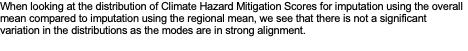

In [ ]:
bar_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_bar()\
        .encode(x=alt.X('Hazard Mitigation:Q', bin=True, axis=None),y='count()')\
        .properties(title='Climate Hazard Mitigation Scores - Overall Mean Imputation')
    
bar_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_bar()\
        .encode(x=alt.X('Hazard Mitigation:Q', bin=True, axis=None),y='count()')\
        .properties(title='Climate Hazard Mitigation Scores - Regional Mean Imputation')
    
rule_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Hazard Mitigation):Q',size=alt.value(5))
rule_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Hazard Mitigation):Q',size=alt.value(5))

alt.hconcat(bar_1+rule_1, bar_2+rule_2)

When looking at the distribution of Renewable Energy Scores for imputation using the overall mean compared to imputation using the regional mean, we see that there is not a significant variation in the distributions as the modes are in strong alignment.

In [ ]:
bar_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_bar()\
        .encode(x=alt.X('Renewable Energy:Q', bin=True, axis=None),y='count()')\
        .properties(title='Renewable Energy Scores - Overall Mean Imputation')
    
bar_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_bar()\
        .encode(x=alt.X('Renewable Energy:Q', bin=True, axis=None),y='count()')\
        .properties(title='Renewable Energy Scores - Regional Mean Imputation')
    
rule_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Renewable Energy):Q',size=alt.value(5))
rule_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Renewable Energy):Q',size=alt.value(5))

alt.hconcat(bar_1+rule_1, bar_2+rule_2)

When looking at the distribution of Water Risk Scores for imputation using the overall mean compared to imputation using the regional mean, we see that there is not a significant variation in the distributions as the modes are in near perfect alignment. This is largely due to the fact that most of the data used in the index was globally available and imputation was minimal.

In [ ]:
bar_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_bar()\
        .encode(x=alt.X('Water Risk:Q', bin=True, axis=None),y='count()')\
        .properties(title='Water Risk Scores - Overall Mean Imputation')
    
bar_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_bar()\
        .encode(x=alt.X('Water Risk:Q', bin=True, axis=None),y='count()')\
        .properties(title='Water Risk Scores - Regional Mean Imputation')
    
rule_1 = alt.Chart(df.loc[df['imputation']=="Full",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Water Risk):Q',size=alt.value(5))
rule_2 = alt.Chart(df.loc[df['imputation']=="Regional",:])\
        .mark_rule(color='red')\
        .encode(x='mean(Water Risk):Q',size=alt.value(5))

alt.hconcat(bar_1+rule_1, bar_2+rule_2)

### Comparisons to CDP Responses

In [ ]:
cdp_index = pd.read_csv("../input/dataset-1/cdp_index_inputs.csv")
df_regional_compare = df_regional.merge(cdp_index[['account_number', 
                             'values_1_1', 'values_1_2',
                             'values_2_1',
                             'values_6_1','values_6_2',
                             'values_7_1']], on = 'account_number')

response_columns = {
    'values_1_1': "Question_8_0", 
    'values_1_2': "Question_8_6",
    'values_2_1': "Question_14_5",
    'values_6_1': "Question_5_0",
    'values_6_2': "Question_5_5",
    'values_7_1': "Question_2_0"}

mapping = {1: "Yes", 0: "No"}
df_regional_compare[list(response_columns.keys())] = df_regional_compare[list(response_columns.keys())].replace(mapping)

df_regional_compare = df_regional_compare.rename(columns=response_columns)

na_subset = df_regional_compare[df_regional_compare['CDP Region']=="North America"].dropna()

background = alt.Chart(countries)\
    .mark_geoshape(fill='lightgray',stroke='white')\
    .project(
                    scale=250, 
                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_1 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Renewable Energy" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_8_0:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Does your city have a renewable energy or electricity target?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_2 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Renewable Energy" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_8_6:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Does your city have a target to increase energy efficiency?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_3 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Water Risk" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_14_5:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Does your city have a publicly available Water Resource Management strategy?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_4 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Emissions Reduction" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_5_0:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Do you have a GHG emissions reduction target(s) in place at the city-wide level?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_5 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Emissions Reduction" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_5_5:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Does your city have a climate change mitigation or energy access plan for reducing city-wide GHG emissions?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)

cdp_cities_6 = alt.Chart(na_subset)\
    .mark_point()\
    .encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.Color("Hazard Mitigation" , 
                        scale=alt.Scale(scheme='inferno')
                       ),
        shape=alt.Shape('Question_2_0:N', title="Response"),
        tooltip=tooltip_fields)\
    .properties(
    title='Has a climate change risk or vulnerability assessment been undertaken for your city?',
    width=400, height = 400
               )\
    .project(                    scale=250, 

                    center=[na_subset.longitude.mean(), 
                            na_subset.latitude.mean()]
)


The maps below illustrate the comparisons of the indicated city ambitions from the CDP survey responses against the amalgamated category scores that primarily consist of our output KPIs. We mapped this based on a subset of the data in North America.

Here we look at the responses from cities that indicated in their survey response whether they had a renewable energy target. From the map below we can see that cities that responded ‘yes’ in the survey are more likely to have a higher renewable energy score than those that responded ‘no’.

In [ ]:
(background + cdp_cities_1)

Here we look at the responses from cities that indicated in their survey response whether they had a target to increase their energy efficiency. From the map below we can see that cities that responded ‘yes’ in the survey are more likely to have a higher renewable energy score, and thus higher energy efficiency than those that responded ‘no’.

In [ ]:
(background + cdp_cities_2)

Here we look at the responses from cities that indicated in their survey response whether they had a publicly available Water Resource Management strategy. From the map below we can see that cities that responded ‘yes’ in the survey are more likely to have a water risk score, and thus higher energy efficiency than those that responded ‘no’. A higher score means that there is lower water related risk.

In [ ]:
(background + cdp_cities_3)

Here we look at the responses from cities that indicated in their survey response whether they had a GHG emissions reduction target in place at a city-wide level. From the map below we can see that there is not a strong statistical relationship between the responses and the scores. 

In [ ]:
(background + cdp_cities_4)

Here we look at the responses from cities that indicated in their survey response whether they had a climate change mitigation or energy access plan for reducing city-wide GHG emissions. From the map below we can see that there is not a strong statistical relationship between the responses and the scores. Although the relationship is not clear, their emission reduction scores maybe influenced by other external factors.

In [ ]:
(background + cdp_cities_5)

Here we look at the responses from cities that indicated in their survey response whether they had a climate risk or vulnerability assessment undertaken for the city. From the map below we can see that cities that responded ‘yes’ in the survey are more likely to have a higher hazard mitigation score, than those that responded ‘no’

In [ ]:
(background + cdp_cities_6)

## Thank you 

Thank you for taking the time to read through our notebook. We hope that you found our report helpful.

Please feel free to reach out if you have any questions.
